<a href="https://colab.research.google.com/github/PaulohenriquePH2023/1-analise-de-dados/blob/main/primeira_analise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EDA - Acidentes de Trânsito - Dados do Portal de Dados abertos**

Introdução

Este notebook tem como objetivo realizar uma Análise Exploratória de Dados (EDA) sobre acidentes de trânsito ocorridos no Distrito Federal. Os dados foram obtidos no Portal de Dados Abertos do Governo, e serão analisados para identificar padrões, tendências e possíveis fatores de risco envolvidos nos acidentes. Serão aplicadas técnicas de limpeza, visualização e interpretação dos dados

# 1. PRIMEIRA ANÁLISE DE DADOS

**PRIMEIRA ANÁLISE DE DADOS**
- importar bibliotecas no notebook
 - obs: se for pelo colab não precisa instalar as bibliotecas
 - se for por ex: jupyter precisa instalar a biblioteca
- comando de instalação de biblioteca
 - ex: !pip install pandas

**Significados**
 - **isnull()**: isnull() é uma função da biblioteca pandas que serve para identificar valores faltantes em uma tabela de dados (DataFrame).
 - **df.isnull().sum()**:
  - **df.isnull()**: mostra onde estão os nulos.
  - **.sum()**: conta quantos nulos existem por coluna.
  - **.head()**: ler as 5 primeiras linhas
  - **.info()**: Mostra os tipos de dados e se tem valores nulos
  - .describe():
  - **pd.to_datetime**:é utilizada na biblioteca Pandas do Python para converter uma sequência de objetos em formato de data/hora para objetos do tipo datetime. Isso é muito útil ao lidar com conjuntos de dados onde datas são representadas como strings ou outros formatos que não são reconhecidos diretamente como datas pelo Python. Essa função permite que você transforme esses dados em um formato que o Pandas pode entender e manipular facilmente.
  - **dayfirst=True**: é um parâmetro da função pd.to_datetime() que indica que o dia vem antes do mês na string de data que você está convertendo.
 - **df**: df é só um nome de variável que geralmente usamos para guardar uma tabela de dados no Python.É uma abreviação comum de DataFrame, que é o tipo de dado principal da biblioteca pandas

# 2. LEITURA DO CSV


## 2.1 Importar bibliotecas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
plt.style.use("ggplot")



## 2.2 Leitura do arquivo CSV


In [3]:
# Lê o arquivo com separador ; e com codificação que evita erro
# erros de codificação (encoding='latin1'), (encoding='ISO-8859-1'), (encoding='cp1252')
def strip_if_str(x):
    return x.strip() if isinstance(x, str) else x

df = pd.read_csv('/content/drive/MyDrive/CURSO_POD_ACADEMY/Tentativa/acidentes.csv', sep=';', encoding='cp1252')

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].map(strip_if_str)

print(df.shape)

df.columns = df.columns.str.strip()

(20506, 11)


In [78]:
df.head()

,Nº_boletim,data_hora_boletim,seq_veic,descricao_categoria,descricao_especie,desc_situacao,desc_tipo_socorro,data,ano,mes,dia_semana,hora,faixa_horaria
0,2021-014038208-001,2021-03-21 12:29:00,1,PARTICULAR,AUTOMOVEL,EM MOVIMENTO,NÃO SE APLICA,2021-03-21,2021,3,Sunday,12,Tarde
1,2021-014038208-001,2021-03-21 12:29:00,2,PARTICULAR,MOTOCICLETA,EM MOVIMENTO,DISPENSOU ATENDIMEN,2021-03-21,2021,3,Sunday,12,Tarde
2,2021-014050858-001,2021-03-21 14:03:00,1,PARTICULAR,CARROCA,EM MOVIMENTO,DISPENSOU ATENDIMEN,2021-03-21,2021,3,Sunday,14,Tarde
3,2021-014050858-001,2021-03-21 14:03:00,2,PARTICULAR,AUTOMOVEL,EM MOVIMENTO,NÃO SE APLICA,2021-03-21,2021,3,Sunday,14,Tarde
4,2021-014056225-001,2021-03-21 15:18:00,2,PARTICULAR,AUTOMOVEL,EM MOVIMENTO,NÃO SE APLICA,2021-03-21,2021,3,Sunday,15,Tarde


# 3. ENTENDENDO O FORMATO DOS DADOS

- df.head()
- df.isnull().sum()
- df.isnull().mean() * 100
- df.info()

In [4]:
df.describe()

,seq_veic,cod_categ,cod_especie,cod_situacao,tipo_socorro
count,20506.00000,20506.000000,20506.000000,20506.000000,20506.000000
mean,1.52726,2.917536,5.699551,1.110504,4.577148
std,0.69531,0.702785,3.474700,0.376433,1.833398
min,1.00000,0.000000,0.000000,0.000000,0.000000
25%,1.00000,3.000000,4.000000,1.000000,3.000000
50%,1.00000,3.000000,6.000000,1.000000,5.000000
75%,2.00000,3.000000,6.000000,1.000000,6.000000
max,15.00000,5.000000,27.000000,3.000000,6.000000


In [5]:
# ler 5 linhas da tabela
df.head()

,Nº_boletim,data_hora_boletim,seq_veic,cod_categ,descricao_categoria,cod_especie,descricao_especie,cod_situacao,desc_situacao,tipo_socorro,desc_tipo_socorro
0,2021-014038208-001,21/03/2021 12:29,1,3,PARTICULAR,6,AUTOMOVEL,1,EM MOVIMENTO,6,NÃO SE APLICA
1,2021-014038208-001,21/03/2021 12:29,2,3,PARTICULAR,4,MOTOCICLETA,1,EM MOVIMENTO,5,DISPENSOU ATENDIMEN
2,2021-014050858-001,21/03/2021 14:03,1,3,PARTICULAR,14,CARROCA,1,EM MOVIMENTO,5,DISPENSOU ATENDIMEN
3,2021-014050858-001,21/03/2021 14:03,2,3,PARTICULAR,6,AUTOMOVEL,1,EM MOVIMENTO,6,NÃO SE APLICA
4,2021-014056225-001,21/03/2021 15:18,2,3,PARTICULAR,6,AUTOMOVEL,1,EM MOVIMENTO,6,NÃO SE APLICA


In [6]:
df.isnull().sum()

,0
Nº_boletim,0
data_hora_boletim,0
seq_veic,0
cod_categ,0
descricao_categoria,0
cod_especie,0
descricao_especie,0
cod_situacao,0
desc_situacao,0
tipo_socorro,0


In [7]:
df.isnull().mean() * 100


,0
Nº_boletim,0.0
data_hora_boletim,0.0
seq_veic,0.0
cod_categ,0.0
descricao_categoria,0.0
cod_especie,0.0
descricao_especie,0.0
cod_situacao,0.0
desc_situacao,0.0
tipo_socorro,0.0


In [8]:
# Mostra os tipos de dados e se tem valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20506 entries, 0 to 20505
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Nº_boletim           20506 non-null  object
 1   data_hora_boletim    20506 non-null  object
 2   seq_veic             20506 non-null  int64 
 3   cod_categ            20506 non-null  int64 
 4   descricao_categoria  20506 non-null  object
 5   cod_especie          20506 non-null  int64 
 6   descricao_especie    20506 non-null  object
 7   cod_situacao         20506 non-null  int64 
 8   desc_situacao        20506 non-null  object
 9   tipo_socorro         20506 non-null  int64 
 10  desc_tipo_socorro    20506 non-null  object
dtypes: int64(5), object(6)
memory usage: 1.7+ MB


**Dados nulos**
 - essa tabela não tem dados nulos

# 4. TRATAMENTO E CRIAÇÃO DE COLUNAS DE DATA E HORA

In [9]:
df['data_hora_boletim'].value_counts()

,count
data_hora_boletim,
25/11/2021 17:22,15
28/10/2021 07:54,12
18/02/2021 04:33,10
14/05/2021 19:25,8
11/10/2021 12:25,7
...,...
30/12/2021 12:05,1
04/12/2021 12:35,1
04/12/2021 11:27,1


In [10]:
df['data_hora_boletim'] = pd.to_datetime(df['data_hora_boletim'], dayfirst=True)
df.head()


,Nº_boletim,data_hora_boletim,seq_veic,cod_categ,descricao_categoria,cod_especie,descricao_especie,cod_situacao,desc_situacao,tipo_socorro,desc_tipo_socorro
0,2021-014038208-001,2021-03-21 12:29:00,1,3,PARTICULAR,6,AUTOMOVEL,1,EM MOVIMENTO,6,NÃO SE APLICA
1,2021-014038208-001,2021-03-21 12:29:00,2,3,PARTICULAR,4,MOTOCICLETA,1,EM MOVIMENTO,5,DISPENSOU ATENDIMEN
2,2021-014050858-001,2021-03-21 14:03:00,1,3,PARTICULAR,14,CARROCA,1,EM MOVIMENTO,5,DISPENSOU ATENDIMEN
3,2021-014050858-001,2021-03-21 14:03:00,2,3,PARTICULAR,6,AUTOMOVEL,1,EM MOVIMENTO,6,NÃO SE APLICA
4,2021-014056225-001,2021-03-21 15:18:00,2,3,PARTICULAR,6,AUTOMOVEL,1,EM MOVIMENTO,6,NÃO SE APLICA


In [11]:
print(df['data_hora_boletim'].isna().sum())

0


In [12]:
df['data'] = df['data_hora_boletim'].dt.date
df['ano'] = df['data_hora_boletim'].dt.year
df['mes'] = df['data_hora_boletim'].dt.month
df['dia_semana'] = df['data_hora_boletim'].dt.day_name()
df['hora'] = df['data_hora_boletim'].dt.hour


# 5. AGRUPAMENTO E VISUALIZAÇÃO DE DADOS POR MÊS

    ano  mes  quantidade       data
0  2021    1        1556 2021-01-01
1  2021    2        1557 2021-02-01
2  2021    3        1453 2021-03-01
3  2021    4        1500 2021-04-01
4  2021    5        1779 2021-05-01


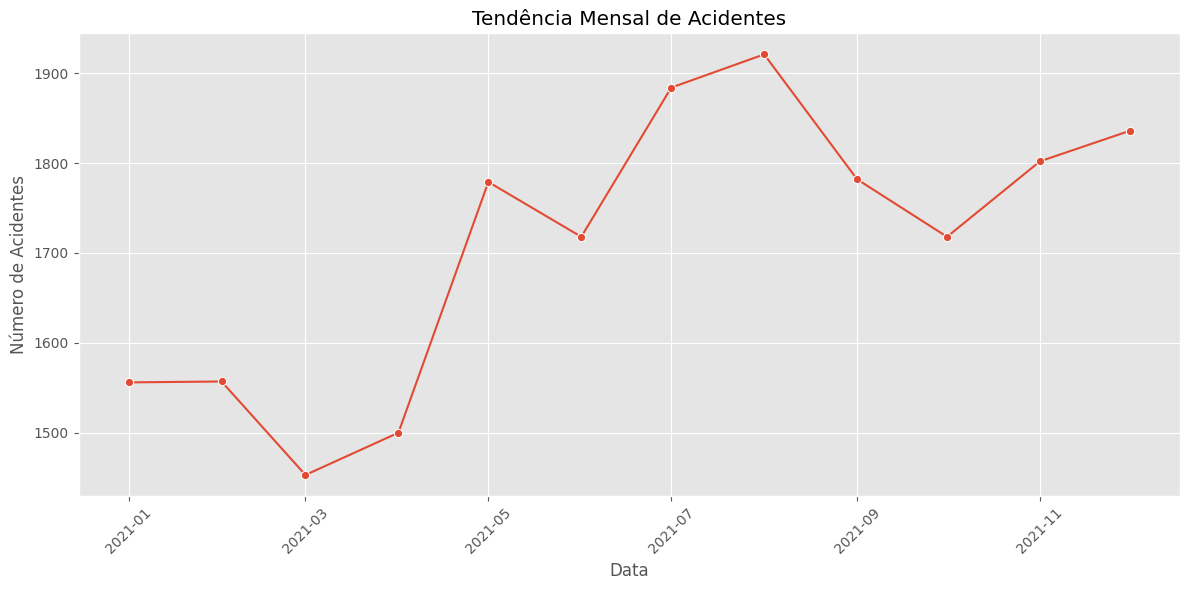

In [13]:
# Agrupar por ano e mês e contar o número de ocorrências
acidentes_por_mes = df.groupby(['ano', 'mes']).size().reset_index(name='quantidade')

# Criar a coluna data corrigida
acidentes_por_mes['data'] = pd.to_datetime(acidentes_por_mes['ano'].astype(str) + '-' + acidentes_por_mes['mes'].astype(str) + '-01')

# Mostrar as primeiras linhas para conferir
print(acidentes_por_mes.head())

# Plotar a série temporal mensal
plt.figure(figsize=(12,6))
sns.lineplot(data=acidentes_por_mes, x='data', y='quantidade', marker='o')
plt.title('Tendência Mensal de Acidentes')
plt.xlabel('Data')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [14]:
acidentes_por_mes['data'] = pd.to_datetime(acidentes_por_mes['ano'].astype(str) + '-' + acidentes_por_mes['mes'].astype(str) + '-01')


# forma mais compacta
# acidentes_por_mes['data'] = pd.to_datetime(acidentes_por_mes[['ano', 'mes']].assign(dia=1))


# 6. CRIAÇÃO DE FAIXAS HORÁRIAS E VISUALIZAÇÃO

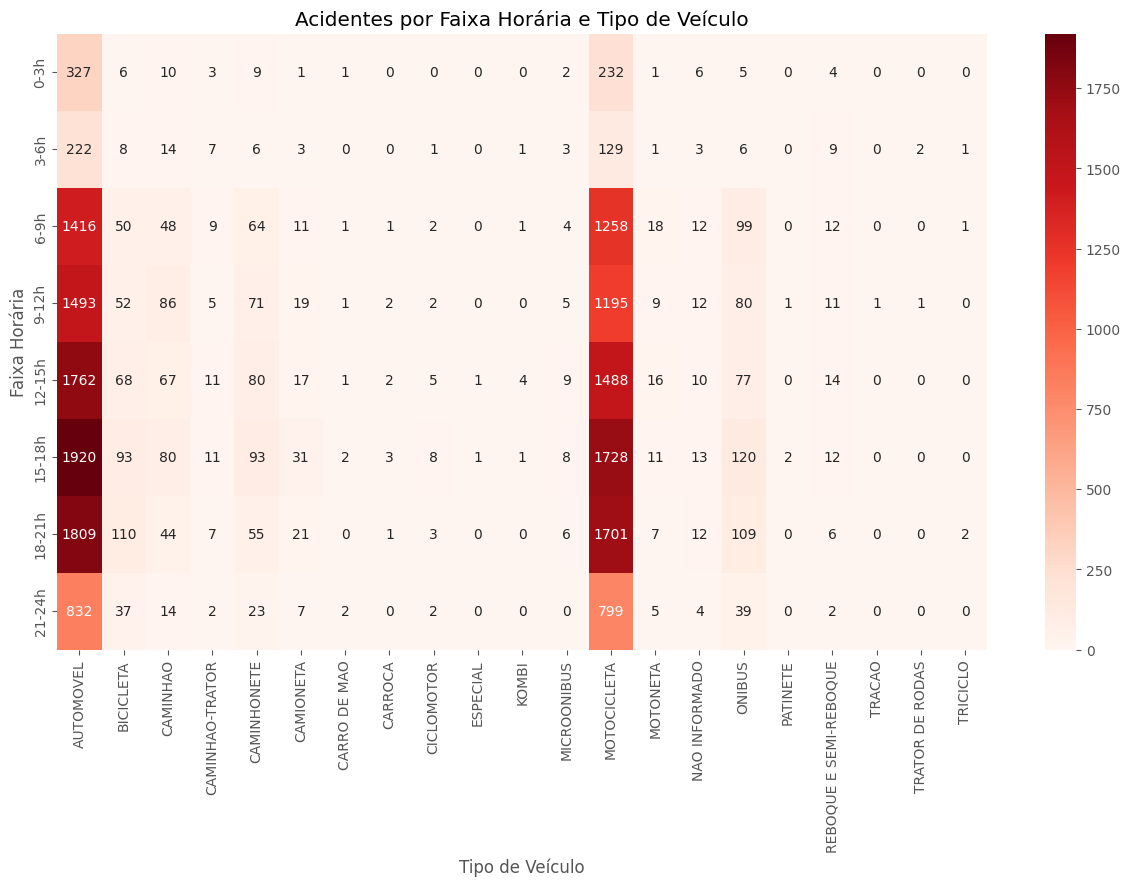

In [15]:
# Criar uma faixa horária (exemplo: de 3 em 3 horas)
bins = [0, 3, 6, 9, 12, 15, 18, 21, 24]
labels = ['0-3h', '3-6h', '6-9h', '9-12h', '12-15h', '15-18h', '18-21h', '21-24h']
df['faixa_horaria'] = pd.cut(df['hora'], bins=bins, labels=labels, right=False, include_lowest=True)

# Agrupar e contar acidentes por faixa horária e tipo de veículo
faixa_veiculo = df.groupby(['faixa_horaria', 'descricao_especie']).size().reset_index(name='contagem')

# Pivotar para deixar no formato mais fácil de visualizar
faixa_veiculo_pivot = faixa_veiculo.pivot(index='faixa_horaria', columns='descricao_especie', values='contagem').fillna(0)

# Plotar heatmap (mapa de calor) para visualizar padrões
plt.figure(figsize=(15,8))
sns.heatmap(faixa_veiculo_pivot, annot=True, fmt='.0f', cmap='Reds')
plt.title('Acidentes por Faixa Horária e Tipo de Veículo')
plt.xlabel('Tipo de Veículo')
plt.ylabel('Faixa Horária')
plt.show()


# 7. ANÁLISES POR DIA DA SEMANA E CATEGORIA

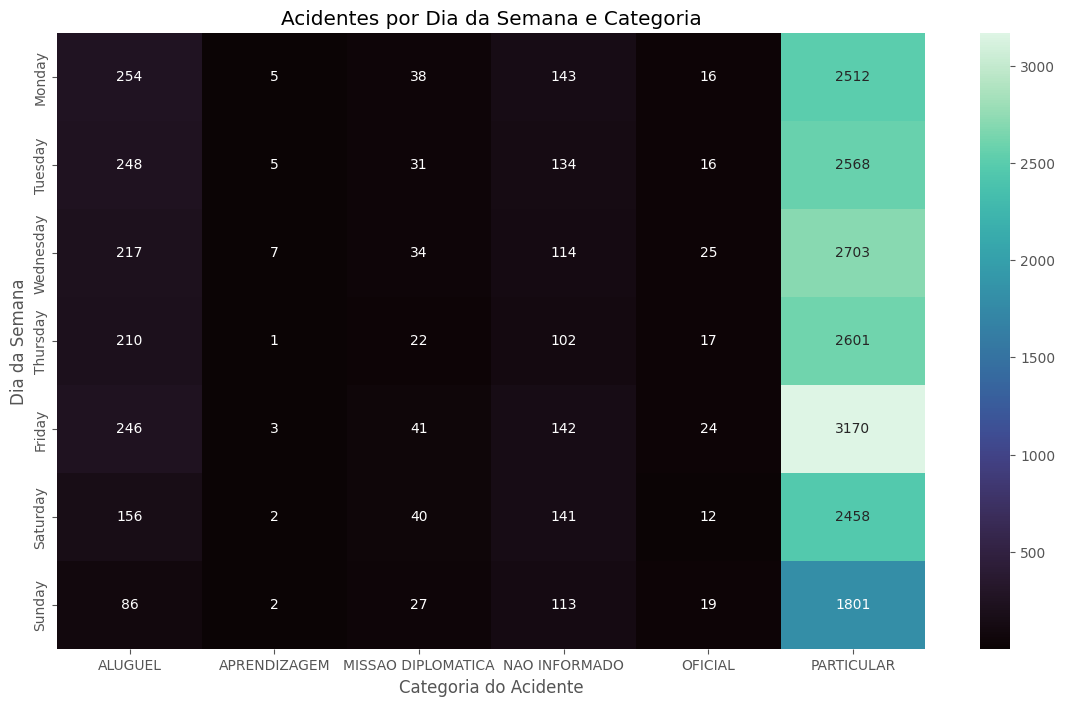

In [16]:
# Contar acidentes por dia da semana e categoria
dia_categoria = df.groupby(['dia_semana', 'descricao_categoria']).size().reset_index(name='contagem')

# Pivot para tabela
dia_categoria_pivot = dia_categoria.pivot(index='dia_semana', columns='descricao_categoria', values='contagem').fillna(0)

# Para ordem dos dias da semana (importante)
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dia_categoria_pivot = dia_categoria_pivot.reindex(dias_ordenados)

# Plot heatmap
plt.figure(figsize=(14,8))
sns.heatmap(dia_categoria_pivot, annot=True, fmt='.0f', cmap='mako')
plt.title('Acidentes por Dia da Semana e Categoria')
plt.xlabel('Categoria do Acidente')
plt.ylabel('Dia da Semana')
plt.show()


# 8. SITUAÇÃO E TIPO DE SOCORRO

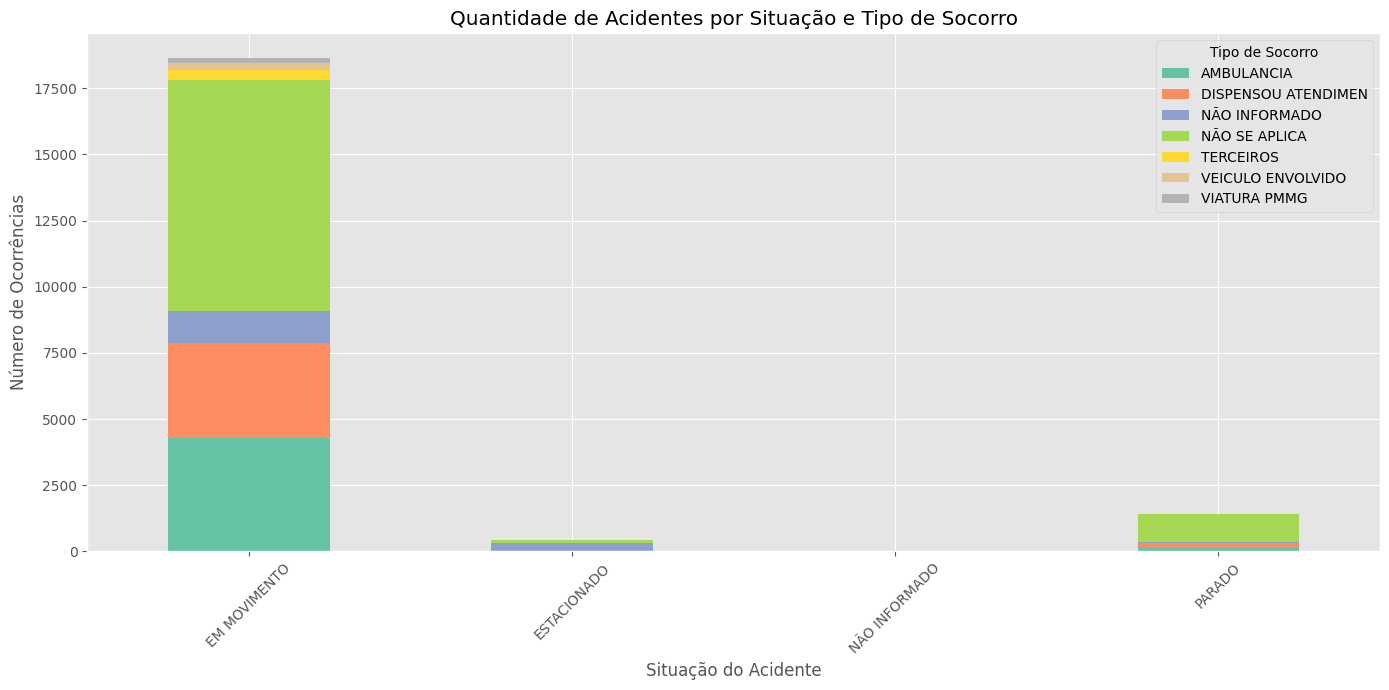

In [17]:
# Contagem cruzada entre situação e tipo de socorro
situacao_socorro = df.groupby(['desc_situacao', 'desc_tipo_socorro']).size().reset_index(name='contagem')

# Pivot para facilitar visualização
situacao_socorro_pivot = situacao_socorro.pivot(index='desc_situacao', columns='desc_tipo_socorro', values='contagem').fillna(0)

# Plot barras empilhadas
situacao_socorro_pivot.plot(kind='bar', stacked=True, figsize=(14,7), colormap='Set2')
plt.title('Quantidade de Acidentes por Situação e Tipo de Socorro')
plt.xlabel('Situação do Acidente')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Socorro')
plt.tight_layout()
plt.show()


# 9. ACIDENTES COM MAIS DE 2 VEÍCULOS

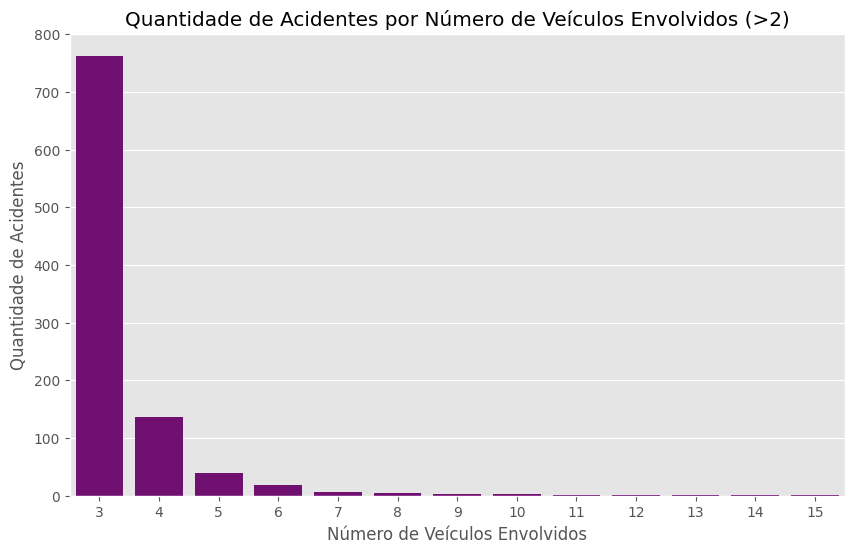

In [18]:
# Filtrar acidentes com mais de 2 veículos envolvidos
acidentes_multiveiculos = df[df['seq_veic'] > 2]

# Contagem por número de veículos envolvidos
contagem_multiveiculos = acidentes_multiveiculos['seq_veic'].value_counts().sort_index()

# Gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x=contagem_multiveiculos.index, y=contagem_multiveiculos.values, color='purple')
plt.title('Quantidade de Acidentes por Número de Veículos Envolvidos (>2)')
plt.xlabel('Número de Veículos Envolvidos')
plt.ylabel('Quantidade de Acidentes')
plt.show()


In [19]:
df.columns

Index(['Nº_boletim', 'data_hora_boletim', 'seq_veic', 'cod_categ',
       'descricao_categoria', 'cod_especie', 'descricao_especie',
       'cod_situacao', 'desc_situacao', 'tipo_socorro', 'desc_tipo_socorro',
       'data', 'ano', 'mes', 'dia_semana', 'hora', 'faixa_horaria'],
      dtype='object')

In [20]:
dias_ordem = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['dia_semana'] = pd.Categorical(df['dia_semana'], categories=dias_ordem, ordered=True)


In [21]:
df[pd.to_datetime(df['data_hora_boletim'], errors='coerce').isna()]


,Nº_boletim,data_hora_boletim,seq_veic,cod_categ,descricao_categoria,cod_especie,descricao_especie,cod_situacao,desc_situacao,tipo_socorro,desc_tipo_socorro,data,ano,mes,dia_semana,hora,faixa_horaria


In [22]:
df.head()

,Nº_boletim,data_hora_boletim,seq_veic,cod_categ,descricao_categoria,cod_especie,descricao_especie,cod_situacao,desc_situacao,tipo_socorro,desc_tipo_socorro,data,ano,mes,dia_semana,hora,faixa_horaria
0,2021-014038208-001,2021-03-21 12:29:00,1,3,PARTICULAR,6,AUTOMOVEL,1,EM MOVIMENTO,6,NÃO SE APLICA,2021-03-21,2021,3,Sunday,12,12-15h
1,2021-014038208-001,2021-03-21 12:29:00,2,3,PARTICULAR,4,MOTOCICLETA,1,EM MOVIMENTO,5,DISPENSOU ATENDIMEN,2021-03-21,2021,3,Sunday,12,12-15h
2,2021-014050858-001,2021-03-21 14:03:00,1,3,PARTICULAR,14,CARROCA,1,EM MOVIMENTO,5,DISPENSOU ATENDIMEN,2021-03-21,2021,3,Sunday,14,12-15h
3,2021-014050858-001,2021-03-21 14:03:00,2,3,PARTICULAR,6,AUTOMOVEL,1,EM MOVIMENTO,6,NÃO SE APLICA,2021-03-21,2021,3,Sunday,14,12-15h
4,2021-014056225-001,2021-03-21 15:18:00,2,3,PARTICULAR,6,AUTOMOVEL,1,EM MOVIMENTO,6,NÃO SE APLICA,2021-03-21,2021,3,Sunday,15,15-18h


-  Próximo passo: Vamos contar registros por dia da semana?

In [23]:
df['dia_semana'].value_counts()


,count
dia_semana,
Friday,3626
Wednesday,3100
Tuesday,3002
Monday,2968
Thursday,2953
Saturday,2809
Sunday,2048


 - Sexta-feira (Friday) tem mais ocorrências

 - Domingo (Sunday) tem menos ocorrências
- Isso pode indicar que os registros (provavelmente acidentes ou boletins) acontecem com mais frequência nos dias úteis, especialmente na sexta, talvez por causa do aumento no trânsito no fim de semana.

- Próximo passo: vamos explorar por horário do dia

In [24]:
df['hora'].value_counts().sort_index()


,count
hora,
0,303
1,195
2,109
3,103
4,129
5,184
6,538
7,1166
8,1303


- Picos de ocorrência:
 - 17h (1497) → pico máximo

 - 18h (1466)

 - 16h (1407)

 - 19h (1318)
- Ou seja, os registros aumentam bastante no fim da tarde/início da noite — o famoso horário de pico, quando muitas pessoas estão saindo do trabalho ou da escola.

- Horas com menos registros:
 - De 1h até 5h da manhã, os números são bem baixos (como esperado)

In [25]:
df_completo = df.copy()

# 10. TRATAMENTO FINAL E REMOÇÃO DE COLUNAS NUMÉRICAS DESNECESSÁRIAS

In [26]:
df = df.drop(columns=['cod_categ', 'cod_especie', 'cod_situacao', 'tipo_socorro'])
df.head()


,Nº_boletim,data_hora_boletim,seq_veic,descricao_categoria,descricao_especie,desc_situacao,desc_tipo_socorro,data,ano,mes,dia_semana,hora,faixa_horaria
0,2021-014038208-001,2021-03-21 12:29:00,1,PARTICULAR,AUTOMOVEL,EM MOVIMENTO,NÃO SE APLICA,2021-03-21,2021,3,Sunday,12,12-15h
1,2021-014038208-001,2021-03-21 12:29:00,2,PARTICULAR,MOTOCICLETA,EM MOVIMENTO,DISPENSOU ATENDIMEN,2021-03-21,2021,3,Sunday,12,12-15h
2,2021-014050858-001,2021-03-21 14:03:00,1,PARTICULAR,CARROCA,EM MOVIMENTO,DISPENSOU ATENDIMEN,2021-03-21,2021,3,Sunday,14,12-15h
3,2021-014050858-001,2021-03-21 14:03:00,2,PARTICULAR,AUTOMOVEL,EM MOVIMENTO,NÃO SE APLICA,2021-03-21,2021,3,Sunday,14,12-15h
4,2021-014056225-001,2021-03-21 15:18:00,2,PARTICULAR,AUTOMOVEL,EM MOVIMENTO,NÃO SE APLICA,2021-03-21,2021,3,Sunday,15,15-18h


In [27]:
df.head()

,Nº_boletim,data_hora_boletim,seq_veic,descricao_categoria,descricao_especie,desc_situacao,desc_tipo_socorro,data,ano,mes,dia_semana,hora,faixa_horaria
0,2021-014038208-001,2021-03-21 12:29:00,1,PARTICULAR,AUTOMOVEL,EM MOVIMENTO,NÃO SE APLICA,2021-03-21,2021,3,Sunday,12,12-15h
1,2021-014038208-001,2021-03-21 12:29:00,2,PARTICULAR,MOTOCICLETA,EM MOVIMENTO,DISPENSOU ATENDIMEN,2021-03-21,2021,3,Sunday,12,12-15h
2,2021-014050858-001,2021-03-21 14:03:00,1,PARTICULAR,CARROCA,EM MOVIMENTO,DISPENSOU ATENDIMEN,2021-03-21,2021,3,Sunday,14,12-15h
3,2021-014050858-001,2021-03-21 14:03:00,2,PARTICULAR,AUTOMOVEL,EM MOVIMENTO,NÃO SE APLICA,2021-03-21,2021,3,Sunday,14,12-15h
4,2021-014056225-001,2021-03-21 15:18:00,2,PARTICULAR,AUTOMOVEL,EM MOVIMENTO,NÃO SE APLICA,2021-03-21,2021,3,Sunday,15,15-18h


# 11. GRÁFICOS DE ANÁLISE

## 11.1 Faixa Horária Customizada

In [28]:
# função

def faixa_horaria(h):
    if 0 <= h < 6:
        return 'Madrugada'
    elif 6 <= h < 12:
        return 'Manhã'
    elif 12 <= h < 18:
        return 'Tarde'
    else:
        return 'Noite'

df['faixa_horaria'] = df['hora'].apply(faixa_horaria)


## 11.2 Ocorrências por Dia da Semana

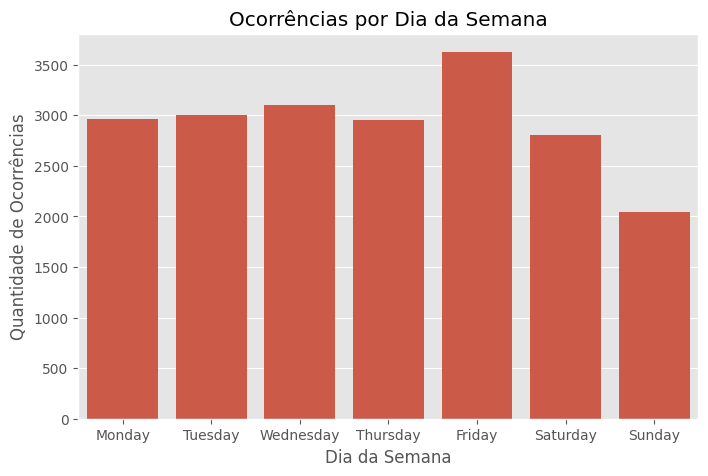

In [29]:
# Em qual dia da semana acontecem mais ocorrências?
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='dia_semana', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Ocorrências por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade de Ocorrências')
plt.show()

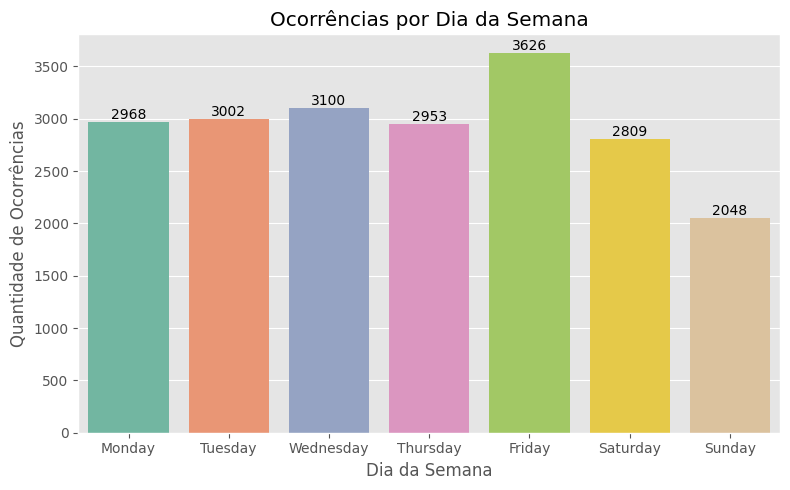

In [30]:
# grafico mais detalhado
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x='dia_semana', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='Set2')
plt.title('Ocorrências por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade de Ocorrências')

# Adiciona os valores acima de cada barra
for p in ax.patches:
    altura = p.get_height()
    ax.annotate(f'{int(altura)}', (p.get_x() + p.get_width() / 2., altura),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


## 11.3 Ocorrências por Hora do Dia

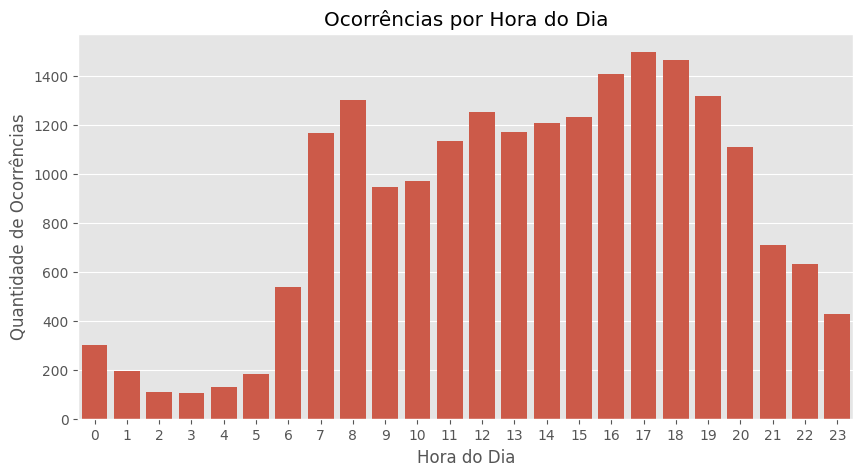

In [31]:
# Em qual hora do dia acontecem mais ocorrências?
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='hora', order=sorted(df['hora'].unique()))
plt.title('Ocorrências por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Quantidade de Ocorrências')
plt.show()

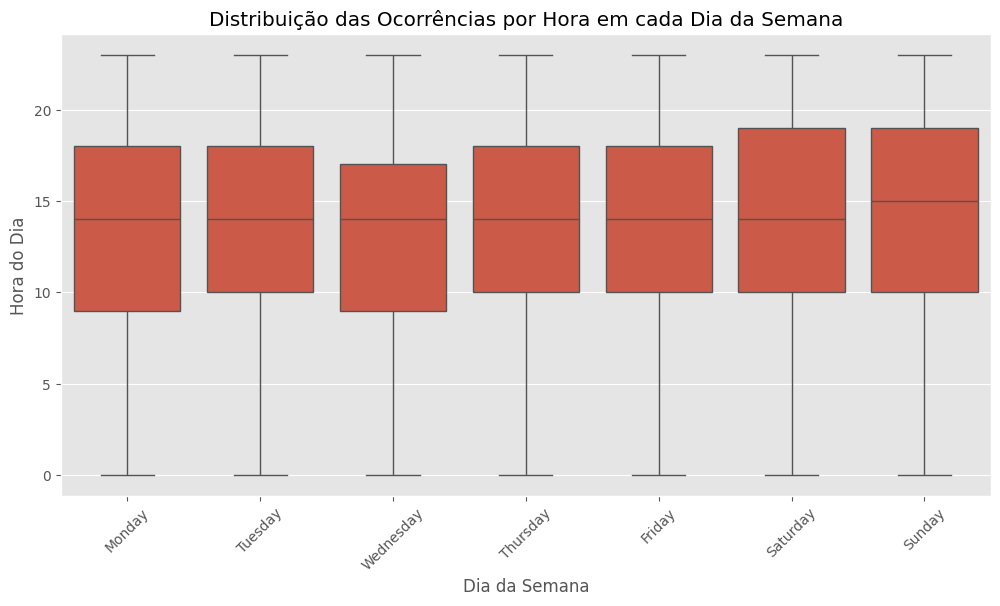

In [32]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='dia_semana', y='hora', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribuição das Ocorrências por Hora em cada Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Hora do Dia')
plt.xticks(rotation=45)
plt.show()


## 11.4 Ranking de Ocorrências por Hora

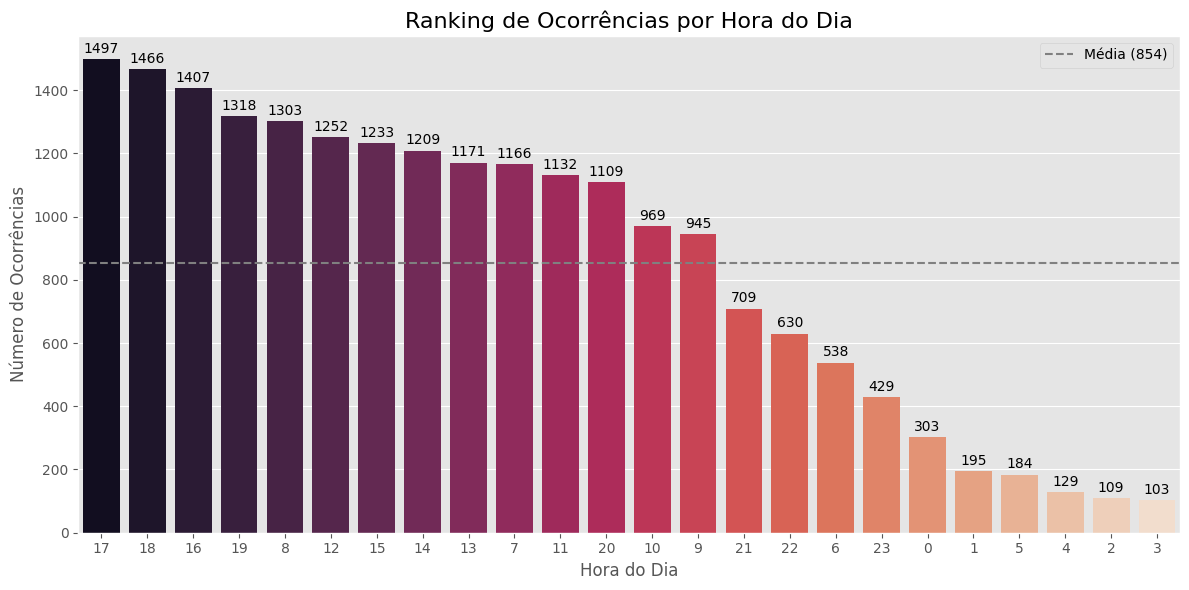

In [57]:
# Agrupar por hora e contar ocorrências
ocorrencias_por_hora = df['hora'].value_counts().sort_values(ascending=False)

# Paleta de cores personalizada
colors = sns.color_palette("rocket", len(ocorrencias_por_hora))

# Criar o gráfico
plt.figure(figsize=(12, 6))
bars = sns.barplot(
    x=ocorrencias_por_hora.index.astype(str),
    y=ocorrencias_por_hora.values,
    palette=colors
)

# Título e rótulos
plt.title('Ranking de Ocorrências por Hora do Dia', fontsize=16)
plt.xlabel('Hora do Dia', fontsize=12)
plt.ylabel('Número de Ocorrências', fontsize=12)

# Adicionando os valores em cima de cada barra
for bar in bars.patches:
    altura = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        altura + 10,
        int(altura),
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Linha horizontal com a média
media_ocorrencias = ocorrencias_por_hora.mean()
plt.axhline(media_ocorrencias, color='gray', linestyle='--', linewidth=1.5, label=f'Média ({media_ocorrencias:.0f})')
plt.legend()

plt.tight_layout()
plt.show()


## 11.5 ACIDENTES POR MÊS

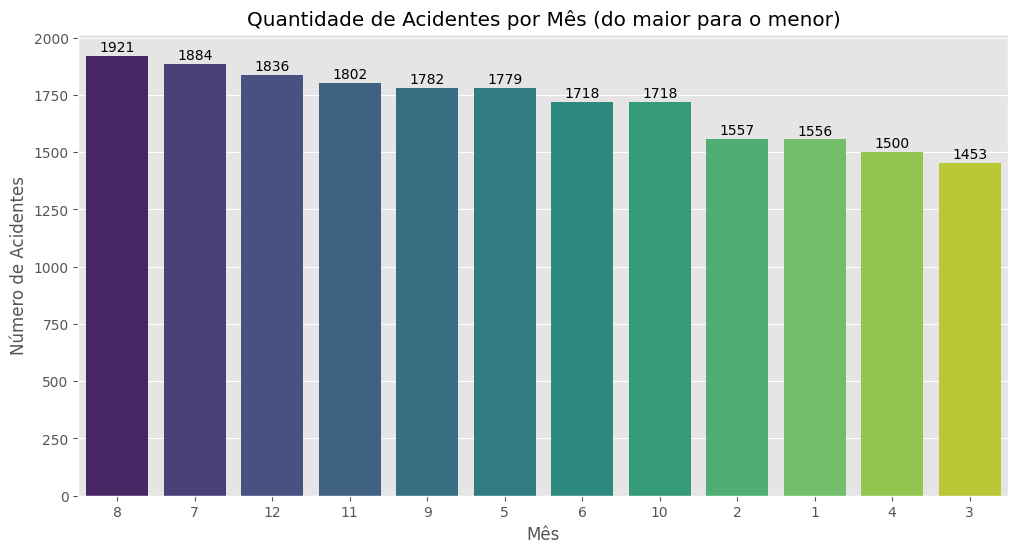

In [62]:
# Contar acidentes por mês e transformar em DataFrame
contagem_mes = df['mes'].value_counts().reset_index()
contagem_mes.columns = ['mes', 'quantidade']

# Ordenar do maior para o menor número de acidentes
contagem_mes = contagem_mes.sort_values('quantidade', ascending=False)

plt.figure(figsize=(12,6))

# Passar explicitamente a ordem dos meses (do maior para o menor número de acidentes)
sns.barplot(data=contagem_mes, x='mes', y='quantidade', order=contagem_mes['mes'], palette='viridis')

# Colocar valores em cima das barras
for i, v in enumerate(contagem_mes['quantidade']):
    plt.text(i, v + max(contagem_mes['quantidade']) * 0.01, str(v), ha='center')

plt.title('Quantidade de Acidentes por Mês (do maior para o menor)')
plt.xlabel('Mês')
plt.ylabel('Número de Acidentes')
plt.show()


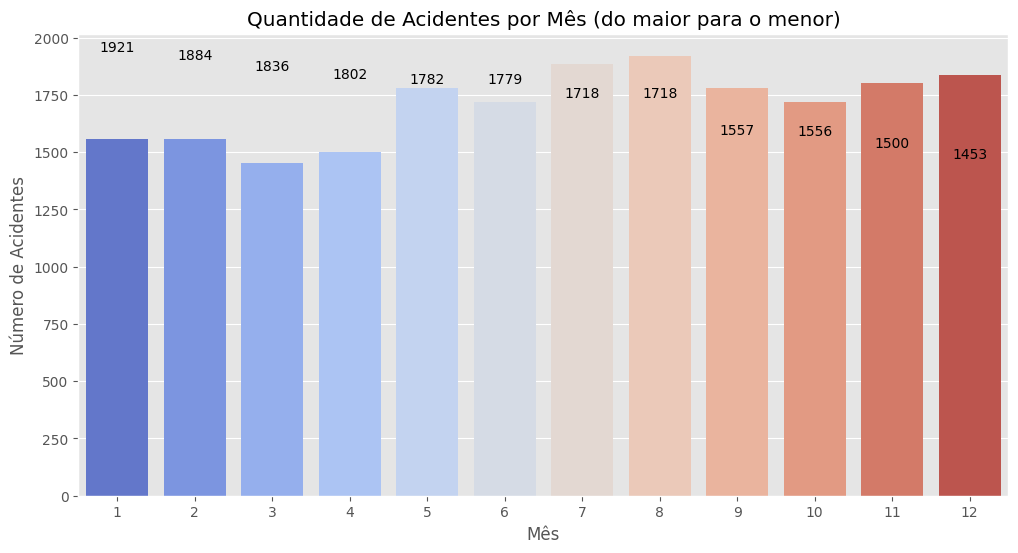

In [63]:
# Contagem por mês e transformar em DataFrame
contagem_mes = df['mes'].value_counts().reset_index()
contagem_mes.columns = ['mes', 'quantidade']

# Ordenar do maior para o menor
contagem_mes = contagem_mes.sort_values(by='quantidade', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=contagem_mes, x='mes', y='quantidade', palette='coolwarm')

# Valores em cima das barras
for i, v in enumerate(contagem_mes['quantidade']):
    plt.text(i, v + max(contagem_mes['quantidade']) * 0.01, str(v), ha='center')

plt.title('Quantidade de Acidentes por Mês (do maior para o menor)')
plt.xlabel('Mês')
plt.ylabel('Número de Acidentes')
plt.show()


## 11.6 TENDÊNCIAS AO LONGO DO ANO

In [73]:
# Conta acidentes por mês
acidentes_mes = df.groupby('mes').size().reset_index(name='qtd_acidentes')


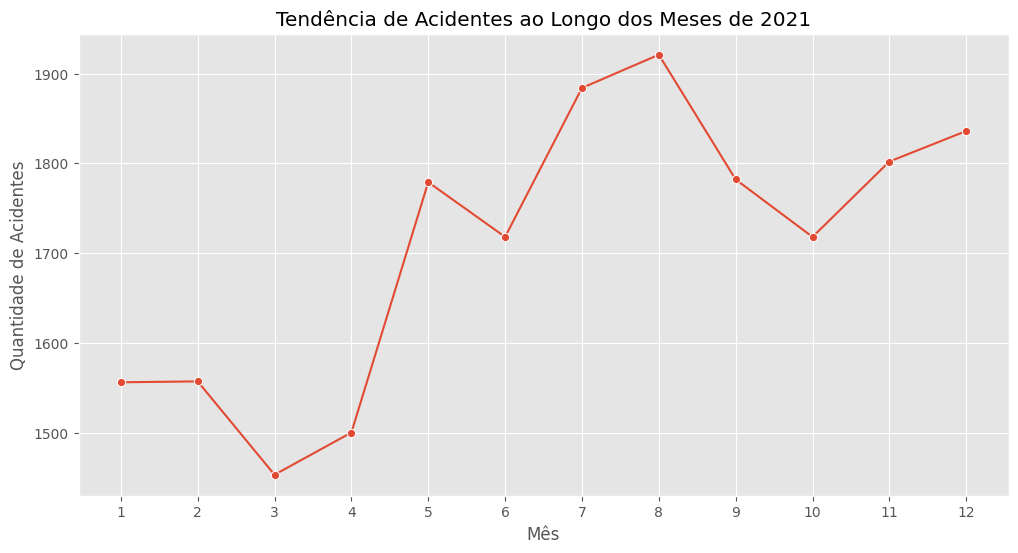

In [74]:
plt.figure(figsize=(12,6))
sns.lineplot(data=acidentes_mes, x='mes', y='qtd_acidentes', marker='o')
plt.title('Tendência de Acidentes ao Longo dos Meses de 2021')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Acidentes')
plt.xticks(range(1,13))
plt.grid(True)
plt.show()


In [75]:
acidentes_mes['var_pct'] = acidentes_mes['qtd_acidentes'].pct_change() * 100
print(acidentes_mes)


    mes  qtd_acidentes    var_pct
0     1           1556        NaN
1     2           1557   0.064267
2     3           1453  -6.679512
3     4           1500   3.234687
4     5           1779  18.600000
5     6           1718  -3.428893
6     7           1884   9.662398
7     8           1921   1.963907
8     9           1782  -7.235815
9    10           1718  -3.591470
10   11           1802   4.889406
11   12           1836   1.886792


## 11.7 ACIDENTES POR TIPO DE SOCORRO

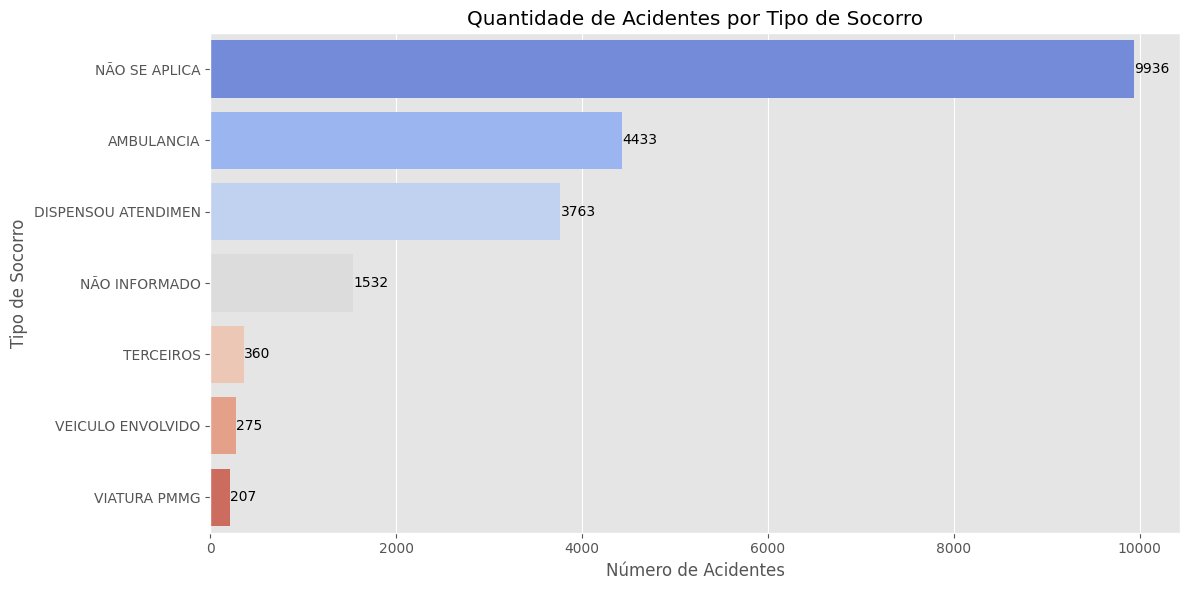

In [76]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='desc_tipo_socorro', order=df['desc_tipo_socorro'].value_counts().index, palette='coolwarm')
plt.title('Quantidade de Acidentes por Tipo de Socorro')
plt.xlabel('Número de Acidentes')
plt.ylabel('Tipo de Socorro')

# Colocar números em cima das barras
contagem = df['desc_tipo_socorro'].value_counts()
for i, v in enumerate(contagem):
    plt.text(v + 5, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()


In [77]:
# Quantidade de registros por tipo de socorro
print(df['desc_tipo_socorro'].value_counts())

# Filtrar só os que são "Não se aplica"
nao_se_aplica = df[df['desc_tipo_socorro'] == 'NÃO SE APLICA']

# Quantidade total
print(f"Total de acidentes sem socorro: {len(nao_se_aplica)}")

# Ver a distribuição por faixa horária
print(nao_se_aplica['faixa_horaria'].value_counts())

# Ver a distribuição por tipo de veículo
print(nao_se_aplica['descricao_especie'].value_counts())

# Ver a distribuição por situação
print(nao_se_aplica['desc_situacao'].value_counts())


desc_tipo_socorro
NÃO SE APLICA          9936
AMBULANCIA             4433
DISPENSOU ATENDIMEN    3763
NÃO INFORMADO          1532
TERCEIROS               360
VEICULO ENVOLVIDO       275
VIATURA PMMG            207
Name: count, dtype: int64
Total de acidentes sem socorro: 9936
faixa_horaria
Tarde        3821
Manhã        3055
Noite        2664
Madrugada     396
Name: count, dtype: int64
descricao_especie
AUTOMOVEL                 7836
MOTOCICLETA                707
ONIBUS                     512
CAMINHONETE                334
CAMINHAO                   306
CAMIONETA                   86
NAO INFORMADO               54
CAMINHAO-TRATOR             45
MICROONIBUS                 29
BICICLETA                   12
TRICICLO                     3
MOTONETA                     3
KOMBI                        3
CARROCA                      2
REBOQUE E SEMI-REBOQUE       2
ESPECIAL                     1
CICLOMOTOR                   1
Name: count, dtype: int64
desc_situacao
EM MOVIMENTO     8754
PARA

- "NÃO SE APLICA" no socorro
Quase metade dos acidentes (9936 de 20506) não teve tipo de socorro registrado — pode ser que nesses casos o acidente não precisou de socorro, ou a informação não foi coletada/registrada.

- Faixa horária dos acidentes sem socorro
A maioria ocorre à tarde (3821), seguida pela manhã (3055) e noite (2664). Pouquíssimos de madrugada (396). Pode indicar que nesses horários, mesmo com acidente, a intervenção não foi necessária ou não registrada.

- Tipo de veículo nos acidentes sem socorro
A esmagadora maioria são automóveis (7836), depois motos (707) e ônibus (512). Esses veículos talvez tenham mais acidentes “menos graves” onde o socorro não é acionado.

- Situação dos veículos nos acidentes sem socorro
Grande parte estava em movimento (8754), bem poucos parados ou estacionados. Isso sugere que muitos acidentes ocorrem no trânsito ativo, mas ainda assim não precisam de socorro.

# 12. ANÁLISES E INSIGHTS

##  Análise e Insights – Ocorrências por Hora do Dia

###  **Picos de Ocorrência**
Os horários com maior número de ocorrências são:

- **17h** → 1.497 ocorrências  
- **18h** → 1.466 ocorrências  
- **16h** → 1.407 ocorrências  

Esses horários coincidem com o final do expediente, momento em que há maior fluxo de veículos nas vias urbanas. Esse padrão sugere um aumento do risco associado ao **retorno para casa**, **trânsito intenso** e possível **fadiga dos condutores**.

---

###  **Períodos Críticos**

- O intervalo entre **12h e 19h** concentra a maior parte dos acidentes.
- Esse período pode estar relacionado ao **acúmulo de tráfego**, **almoço**, **atividades de rua** e o retorno do trabalho.
- O horário de almoço (12h–14h) mostra um crescimento significativo nas ocorrências, indicando movimentação intensa nesse período.

---

###  **Pico Matinal**
Outro momento com aumento visível é o início da manhã, entre **7h e 9h**, associado ao trânsito de ida ao trabalho e início das atividades escolares. Ainda que menor que o pico da tarde, representa um ponto de atenção importante.

---

###  **Menores Ocorrências**
Os horários com **menor número de ocorrências** são:

- **03h** → 103 ocorrências  
- **02h** → 109 ocorrências  
- **04h** → 129 ocorrências  

Esses horários correspondem à **madrugada**, quando há menor circulação de veículos. Porém...

---

###  **Anomalia Notável**
Mesmo na madrugada, o horário das **00h (meia-noite)** apresenta **303 ocorrências**, número superior aos horários seguintes (1h até 5h). Isso pode indicar:

- Direção sob efeito de **álcool** (eventos e festas noturnas)  
- **Fadiga** dos motoristas  
- Menor fiscalização e visibilidade

Essa faixa entre **23h e 01h** parece configurar uma **janela de risco**, mesmo com baixo volume de tráfego.

---

###  **Curva de Risco Diária**
- Há um crescimento gradual de acidentes a partir das **6h da manhã**, atingindo o **ápice entre 16h e 18h**, e caindo progressivamente após as **19h**.
- A média diária de ocorrências por hora gira em torno de **aproximadamente X** (substitua por `df['hora'].value_counts().mean()` se quiser o valor real).

---

###  **Recomendações**
- Reforçar **campanhas de conscientização** para motoristas, especialmente no período das 16h às 19h.
- Considerar **ajustes nas escalas de policiamento, ambulâncias e serviços de emergência** com foco nas horas críticas.
- Usar dados para **alocar sensores, radares e monitoramento inteligente** nas faixas de maior risco.
- Realizar ações educativas e fiscalizações específicas para o turno da **noite/madrugada**, especialmente por volta da meia-noite.

---

###  Conclusão Estratégica
O fator **tempo** (hora do dia) se mostra um dos principais **determinantes do risco de acidentes**. A análise por hora pode servir como base sólida para **planejamento urbano, segurança viária e políticas públicas de mobilidade**.


# 13. GRÁFICOS POR TIPO DE VEÍCULO E FAIXA HORÁRIA

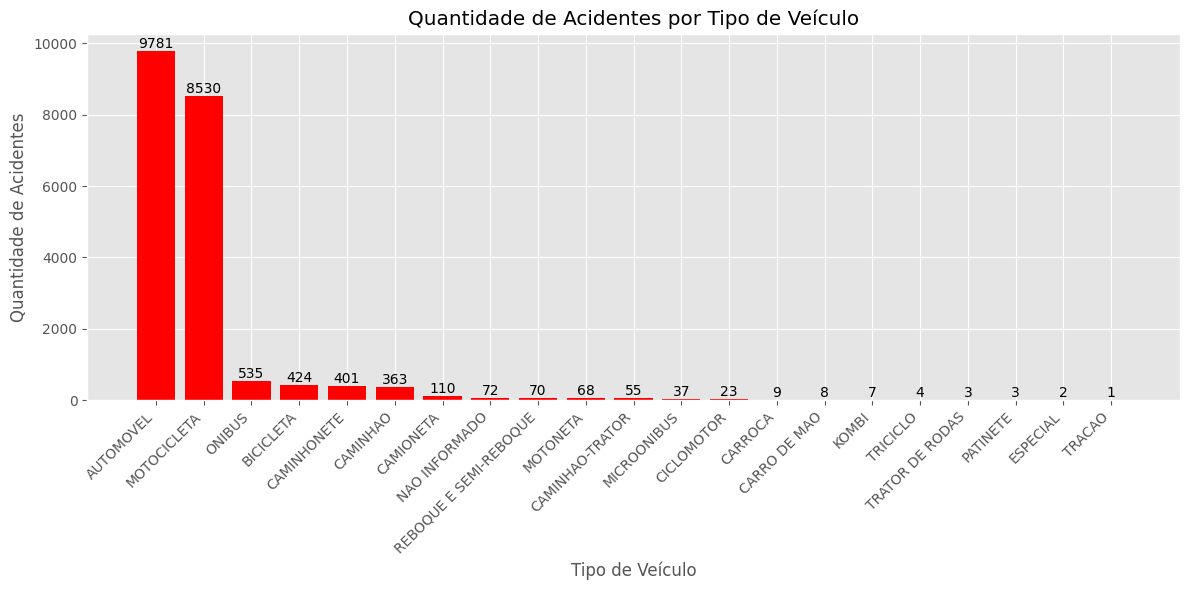

In [34]:
# Contar a quantidade de ocorrências por tipo de veículo
contagem_veiculos = df['descricao_especie'].value_counts()

# Configurar o gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(contagem_veiculos.index, contagem_veiculos.values, color='red')

# Adicionar os números em cima das barras
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # posição horizontal central da barra
        height,                            # posição vertical no topo da barra
        f'{int(height)}',                  # texto com o valor inteiro da altura
        ha='center',                      # alinhamento horizontal centralizado
        va='bottom',                      # alinhamento vertical embaixo do texto
        fontsize=10,
        color='black'
    )

# Ajustar rótulos
plt.xticks(rotation=45, ha='right')  # rotaciona os nomes para melhor leitura
plt.xlabel('Tipo de Veículo')
plt.ylabel('Quantidade de Acidentes')
plt.title('Quantidade de Acidentes por Tipo de Veículo')
plt.tight_layout()
plt.show()


In [35]:
def faixa_horaria(h):
    if 0 <= h < 6:
        return 'Madrugada'
    elif 6 <= h < 12:
        return 'Manhã'
    elif 12 <= h < 18:
        return 'Tarde'
    else:
        return 'Noite'

df['faixa_horaria'] = df['hora'].apply(faixa_horaria)


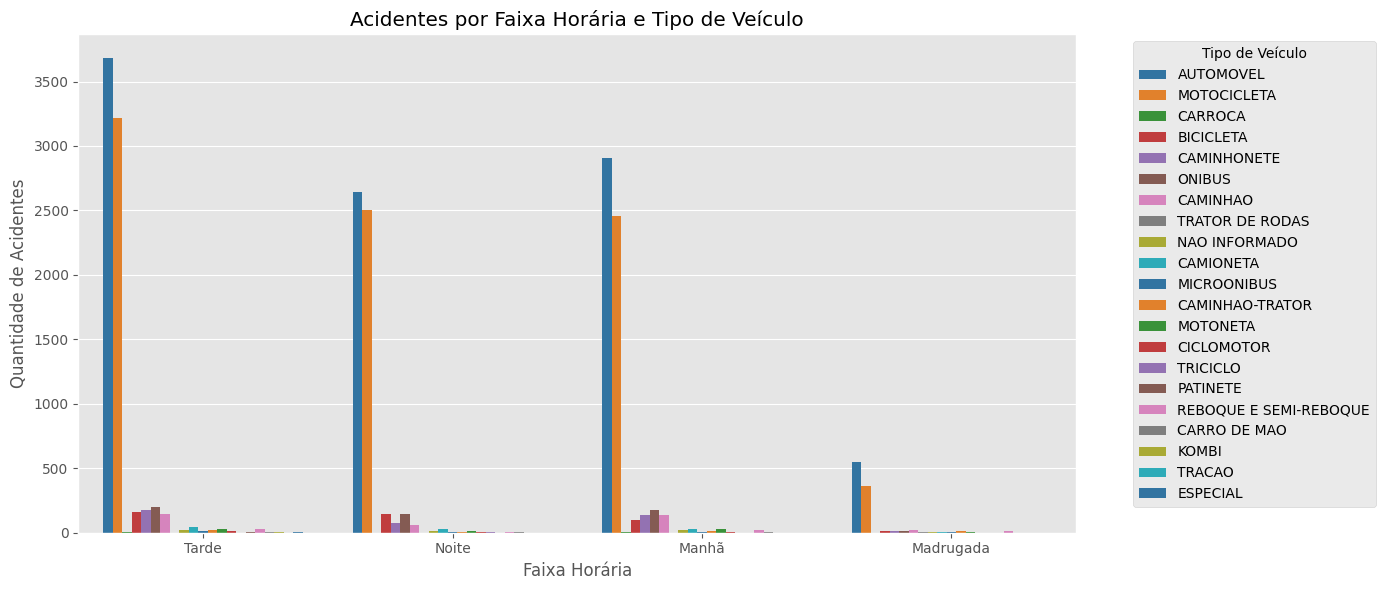

In [36]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='faixa_horaria', hue='descricao_especie', palette='tab10')
plt.title('Acidentes por Faixa Horária e Tipo de Veículo')
plt.xlabel('Faixa Horária')
plt.ylabel('Quantidade de Acidentes')
plt.legend(title='Tipo de Veículo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


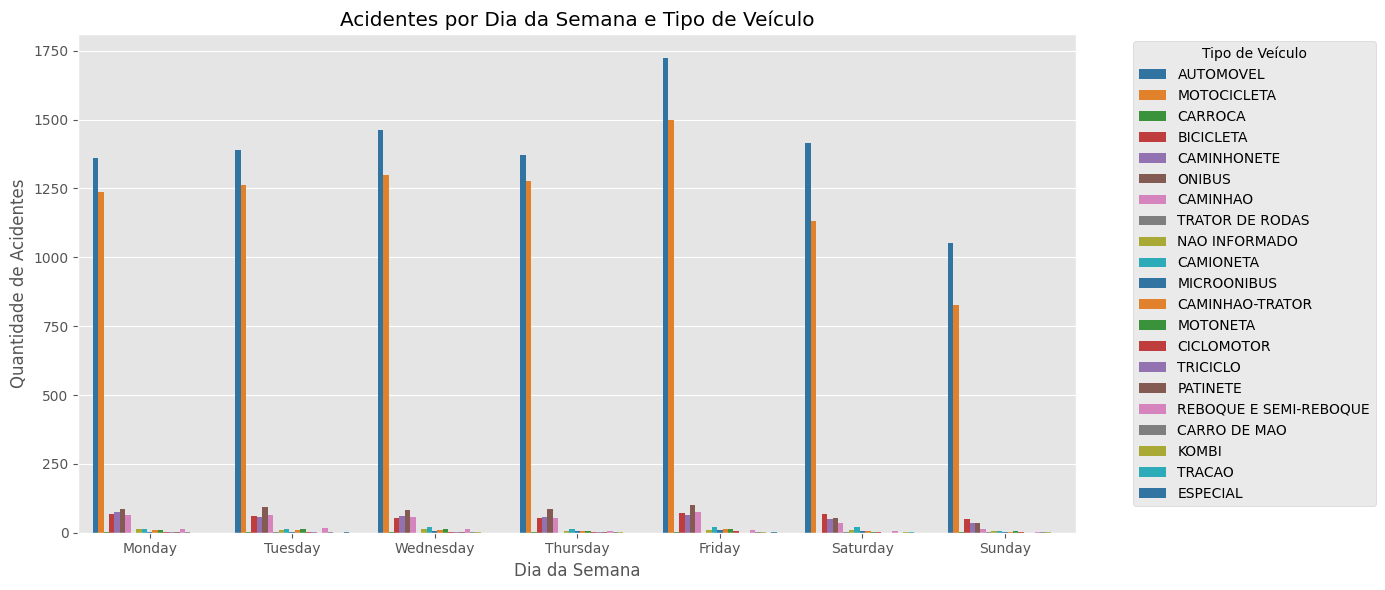

In [37]:
plt.figure(figsize=(14,6))
# Se quiser os dias da semana em ordem (seg a dom)
dias_ordem = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.countplot(data=df, x='dia_semana', hue='descricao_especie', order=dias_ordem, palette='tab10')
plt.title('Acidentes por Dia da Semana e Tipo de Veículo')
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade de Acidentes')
plt.legend(title='Tipo de Veículo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Index(['Nº_boletim', 'data_hora_boletim', 'seq_veic', 'descricao_categoria',
       'descricao_especie', 'desc_situacao', 'desc_tipo_socorro', 'data',
       'ano', 'mes', 'dia_semana', 'hora', 'faixa_horaria'],
      dtype='object')


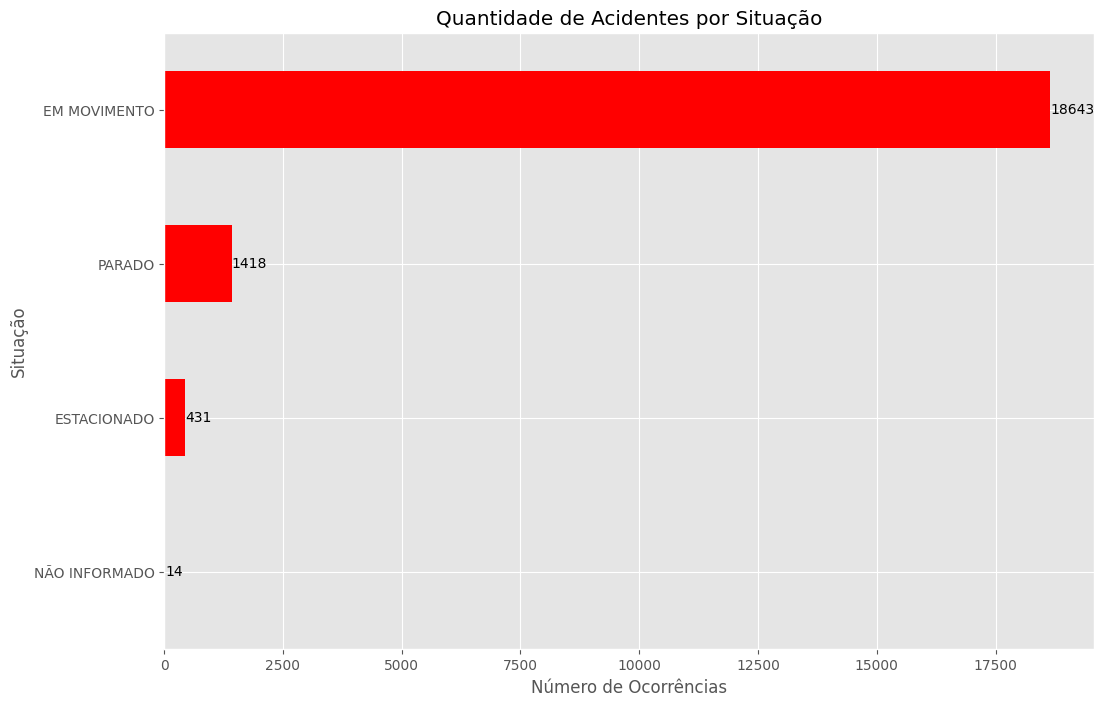

In [38]:
# Supondo que seu DataFrame se chama df
# Primeiro, cheque o nome correto da coluna
print(df.columns)

# Depois, faça a contagem das ocorrências por situação
contagem_situacao = df['desc_situacao'].value_counts()

# Agora, vamos montar o gráfico de barras horizontal
plt.figure(figsize=(12,8))
contagem_situacao.plot(kind='barh', color='red')

# Adiciona os números de ocorrências no gráfico
for i, v in enumerate(contagem_situacao):
    plt.text(v + 5, i, str(v), color='black', va='center')

plt.title('Quantidade de Acidentes por Situação')
plt.xlabel('Número de Ocorrências')
plt.ylabel('Situação')
plt.gca().invert_yaxis()  # Inverter eixo y para mostrar o maior no topo
plt.show()

Insights sobre Acidentes por Situação
- Situação mais comum: "EM MOVIMENTO"
A maior parte dos acidentes acontece com veículos em movimento. Isso faz sentido, porque veículos parados tendem a ter menos risco de colisões. Então, o foco principal para prevenção deve estar no comportamento e condições de veículos em circulação.

- Outras situações com menos acidentes
Situações como “PARADO” ou “EM ESTACIONAMENTO” aparecem com números bem menores, indicando que acidentes envolvendo veículos parados são menos frequentes.

- Aplicações práticas

 - Campanhas educativas para alertar motoristas sobre atenção ao dirigir, especialmente em trânsito movimentado.

 - Reforço na fiscalização e sinalização em áreas de fluxo intenso.

 - Investimento em tecnologias e alertas para evitar colisões em movimento (freios automáticos, sensores, etc).

In [39]:
print(df.columns)


Index(['Nº_boletim', 'data_hora_boletim', 'seq_veic', 'descricao_categoria',
       'descricao_especie', 'desc_situacao', 'desc_tipo_socorro', 'data',
       'ano', 'mes', 'dia_semana', 'hora', 'faixa_horaria'],
      dtype='object')


In [40]:
# Estatísticas básicas (para colunas numéricas)
df.describe()

,data_hora_boletim,seq_veic,ano,mes,hora
count,20506,20506.00000,20506.0,20506.000000,20506.000000
mean,2021-07-08 14:05:03.127864832,1.52726,2021.0,6.722910,13.677655
min,2021-01-01 00:09:00,1.00000,2021.0,1.000000,0.000000
25%,2021-04-12 17:11:45,1.00000,2021.0,4.000000,10.000000
50%,2021-07-11 10:12:00,1.00000,2021.0,7.000000,14.000000
75%,2021-10-05 07:39:30,2.00000,2021.0,10.000000,18.000000
max,2021-12-31 19:00:00,15.00000,2021.0,12.000000,23.000000
std,NaN,0.69531,0.0,3.408265,5.256732


In [46]:
df.isna().sum()


,0
Nº_boletim,0
data_hora_boletim,0
seq_veic,0
descricao_categoria,0
descricao_especie,0
desc_situacao,0
desc_tipo_socorro,0
data,0
ano,0
mes,0


In [42]:
df['seq_veic'].value_counts().sort_index()

,count
seq_veic,
1,11096
2,8430
3,763
4,136
5,39
6,18
7,7
8,4
9,3


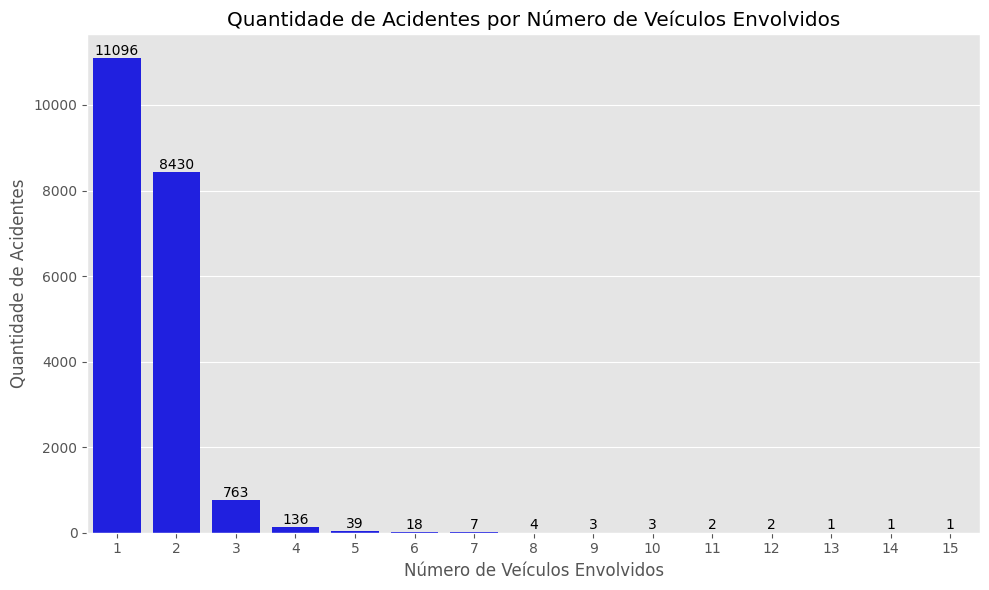

In [64]:
plt.figure(figsize=(10,6))
counts = df['seq_veic'].value_counts().sort_index()
bars = sns.barplot(x=counts.index, y=counts.values, color='blue')

# Adiciona o número em cima de cada barra
for bar in bars.patches:
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, altura + 5, int(altura),
             ha='center', va='bottom', fontsize=10)

plt.title('Quantidade de Acidentes por Número de Veículos Envolvidos')
plt.xlabel('Número de Veículos Envolvidos')
plt.ylabel('Quantidade de Acidentes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [43]:
df[df['seq_veic'] > 5].sort_values('seq_veic', ascending=False)


,Nº_boletim,data_hora_boletim,seq_veic,descricao_categoria,descricao_especie,desc_situacao,desc_tipo_socorro,data,ano,mes,dia_semana,hora,faixa_horaria
13710,2021-056709684-004,2021-11-25 17:22:00,15,PARTICULAR,AUTOMOVEL,EM MOVIMENTO,AMBULANCIA,2021-11-25,2021,11,Thursday,17,Tarde
13709,2021-056709684-004,2021-11-25 17:22:00,14,PARTICULAR,CAMINHONETE,EM MOVIMENTO,NÃO SE APLICA,2021-11-25,2021,11,Thursday,17,Tarde
20335,2021-056709684-004,2021-11-25 17:22:00,13,ALUGUEL,REBOQUE E SEMI-REBOQUE,EM MOVIMENTO,NÃO INFORMADO,2021-11-25,2021,11,Thursday,17,Tarde
13698,2021-056709684-004,2021-11-25 17:22:00,12,ALUGUEL,CAMINHAO-TRATOR,EM MOVIMENTO,AMBULANCIA,2021-11-25,2021,11,Thursday,17,Tarde
19583,2021-052009050-001,2021-10-28 07:54:00,12,ALUGUEL,CAMINHAO,EM MOVIMENTO,NÃO SE APLICA,2021-10-28,2021,10,Thursday,7,Manhã
19582,2021-052009050-001,2021-10-28 07:54:00,11,ALUGUEL,ONIBUS,EM MOVIMENTO,NÃO SE APLICA,2021-10-28,2021,10,Thursday,7,Manhã
13706,2021-056709684-004,2021-11-25 17:22:00,11,PARTICULAR,AUTOMOVEL,PARADO,NÃO SE APLICA,2021-11-25,2021,11,Thursday,17,Tarde
13707,2021-056709684-004,2021-11-25 17:22:00,10,PARTICULAR,AUTOMOVEL,EM MOVIMENTO,NÃO SE APLICA,2021-11-25,2021,11,Thursday,17,Tarde
20214,2021-008470526-001,2021-02-18 04:33:00,10,PARTICULAR,AUTOMOVEL,ESTACIONADO,NÃO INFORMADO,2021-02-18,2021,2,Thursday,4,Madrugada
19578,2021-052009050-001,2021-10-28 07:54:00,10,PARTICULAR,AUTOMOVEL,EM MOVIMENTO,NÃO SE APLICA,2021-10-28,2021,10,Thursday,7,Manhã


-Distribuição Geral:

 - 95% dos boletins têm até 2 veículos envolvidos.

 - Casos com 3 ou mais veículos são raros e devem ser analisados com atenção — geralmente envolvem acidentes maiores ou colisões múltiplas.

- Exemplo específico:

- O boletim 2021-056709684-004 parece ser um evento atípico, com 15 veículos. É provável que represente um engavetamento ou grande ocorrência viária.

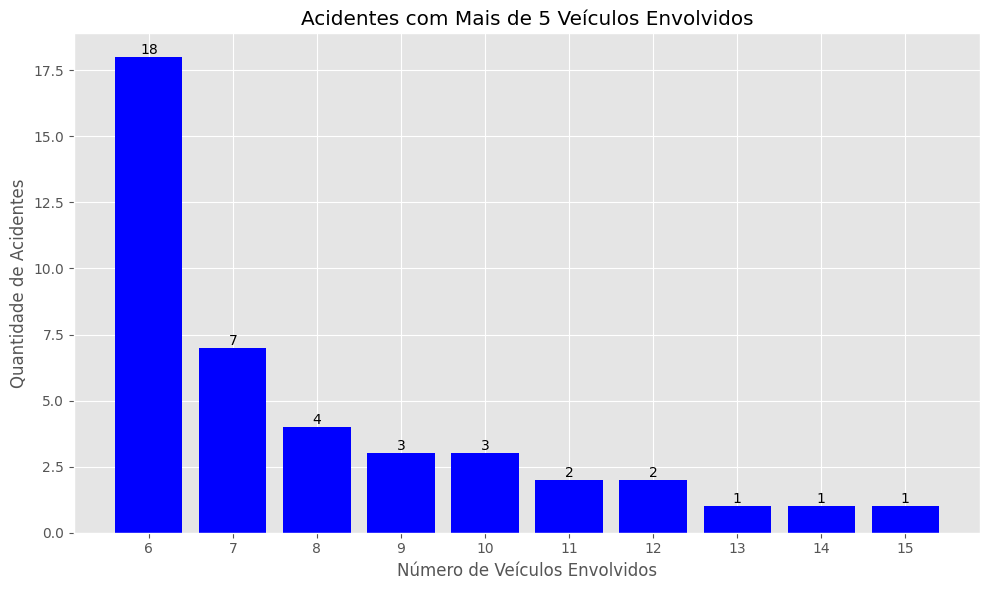

In [65]:
# Filtra só os acidentes com mais de 5 veículos
df_mais_5 = df[df['seq_veic'] > 5]

# Contagem dos acidentes por número de veículos
contagem_mais_5 = df_mais_5['seq_veic'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(contagem_mais_5.index, contagem_mais_5.values, color='blue')

# Colocar os números em cima das barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(int(height)),
             ha='center', va='bottom', fontsize=10)

plt.xlabel('Número de Veículos Envolvidos')
plt.ylabel('Quantidade de Acidentes')
plt.title('Acidentes com Mais de 5 Veículos Envolvidos')
plt.xticks(contagem_mais_5.index)
plt.tight_layout()
plt.show()


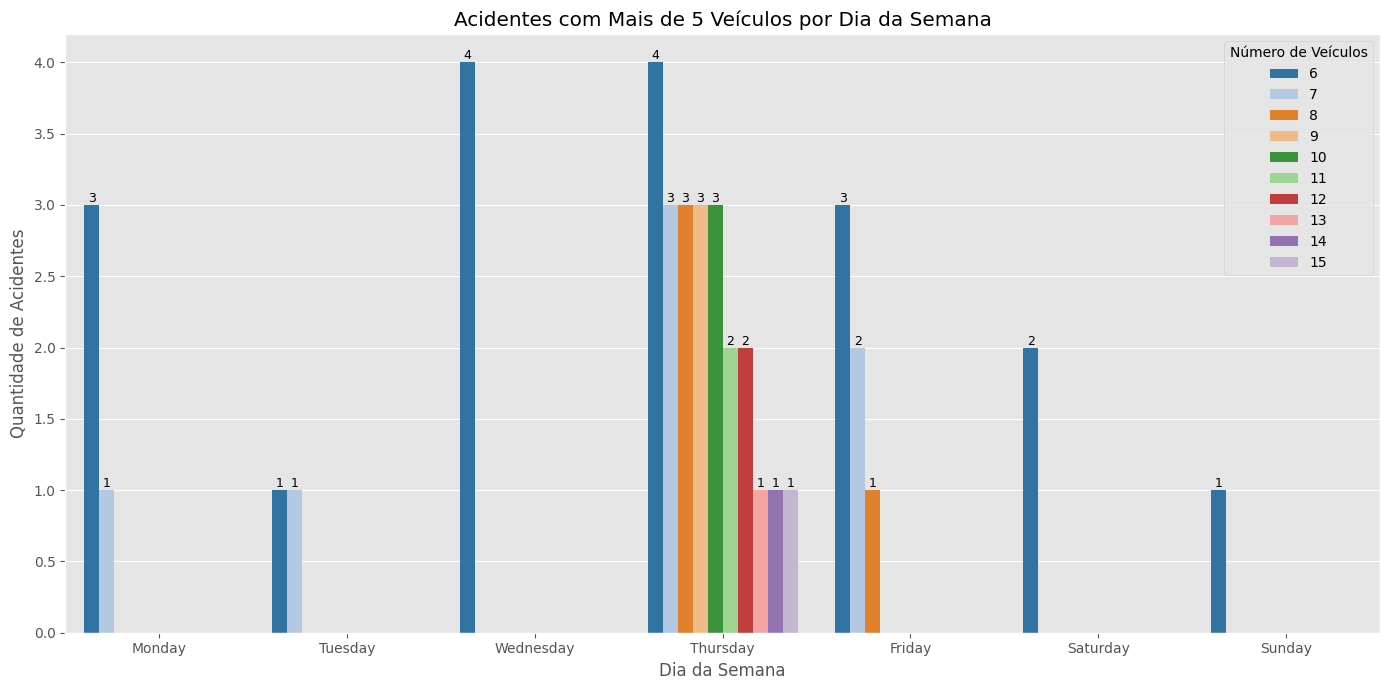

In [66]:
df_mais_5 = df[df['seq_veic'] > 5]
dias_ordem = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(14,7))
ax = sns.countplot(data=df_mais_5, x='dia_semana', hue='seq_veic', order=dias_ordem, palette='tab20')

plt.title('Acidentes com Mais de 5 Veículos por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade de Acidentes')

# Colocar os números em cima das barras, com ajuste fino
for p in ax.patches:
    altura = p.get_height()
    if altura > 0:
        ax.text(p.get_x() + p.get_width()/2, altura + 0.0, int(altura),
                ha='center', va='bottom', fontsize=9)

plt.legend(title='Número de Veículos')
plt.tight_layout()
plt.show()


In [44]:
print(df.columns)

Index(['Nº_boletim', 'data_hora_boletim', 'seq_veic', 'descricao_categoria',
       'descricao_especie', 'desc_situacao', 'desc_tipo_socorro', 'data',
       'ano', 'mes', 'dia_semana', 'hora', 'faixa_horaria'],
      dtype='object')


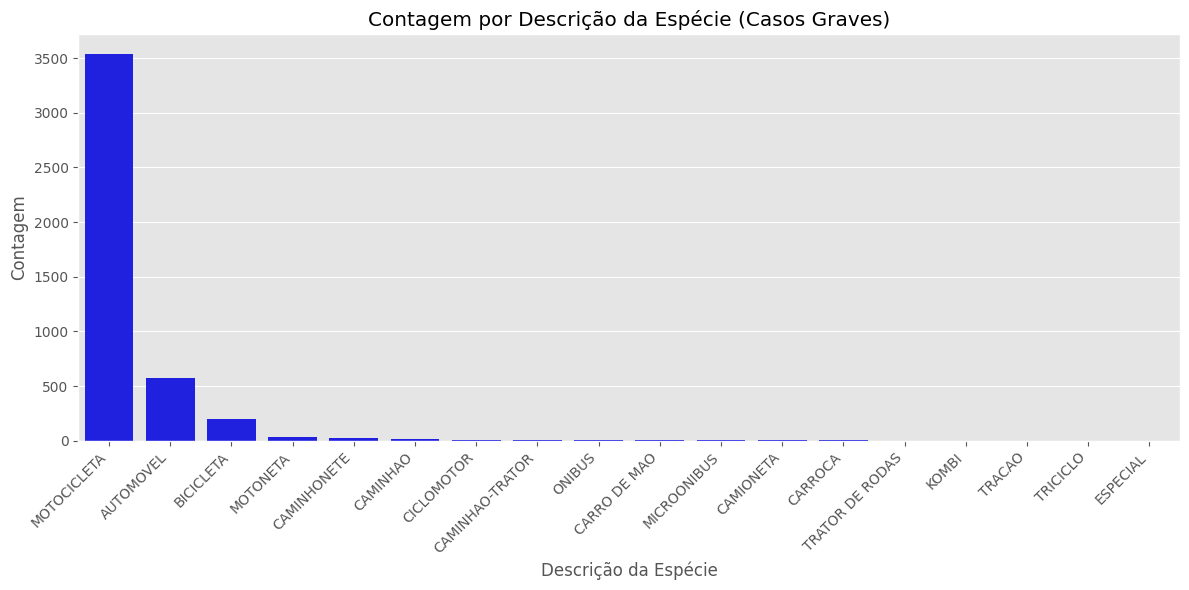

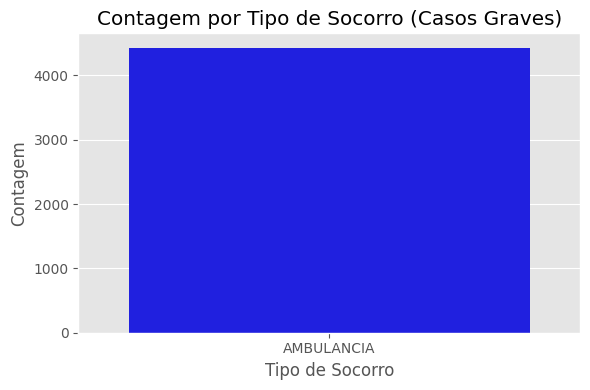

In [67]:
# 1. Filtrar casos graves (com ambulância)
casos_graves = df[df['desc_tipo_socorro'].str.upper().str.strip() == 'AMBULANCIA']

# 2. Criar DataFrame automático da contagem por descrição da espécie
df_especie = casos_graves['descricao_especie'].value_counts().reset_index()
df_especie.columns = ['descricao_especie', 'contagem']

# 3. Criar DataFrame automático da contagem por tipo de socorro
df_socorro = casos_graves['desc_tipo_socorro'].value_counts().reset_index()
df_socorro.columns = ['desc_tipo_socorro', 'contagem']

# 4. Plotar gráfico de contagem por espécie (casos graves)
plt.figure(figsize=(12,6))
sns.barplot(x='descricao_especie', y='contagem', data=df_especie, color='blue')
plt.xticks(rotation=45, ha='right')
plt.title('Contagem por Descrição da Espécie (Casos Graves)')
plt.xlabel('Descrição da Espécie')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()

# 5. Plotar gráfico de contagem por tipo de socorro (casos graves)
plt.figure(figsize=(6,4))
sns.barplot(x='desc_tipo_socorro', y='contagem', data=df_socorro, color='blue')
plt.title('Contagem por Tipo de Socorro (Casos Graves)')
plt.xlabel('Tipo de Socorro')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()


# 14. CORRELAÇÃO ENTRE VARIÁVEIS

In [68]:
# Cruzando tipo de veículo x situação
tabela_veic_situ = pd.crosstab(df['descricao_especie'], df['desc_situacao'])
print(tabela_veic_situ)


desc_situacao           EM MOVIMENTO  ESTACIONADO  NÃO INFORMADO  PARADO
descricao_especie                                                       
AUTOMOVEL                       8436          344              3     998
BICICLETA                        422            0              1       1
CAMINHAO                         303           22              1      37
CAMINHAO-TRATOR                   50            1              1       3
CAMINHONETE                      334           20              0      47
CAMIONETA                         94            7              0       9
CARRO DE MAO                       7            0              0       1
CARROCA                            7            0              0       2
CICLOMOTOR                        22            0              0       1
ESPECIAL                           2            0              0       0
KOMBI                              7            0              0       0
MICROONIBUS                       32            2  

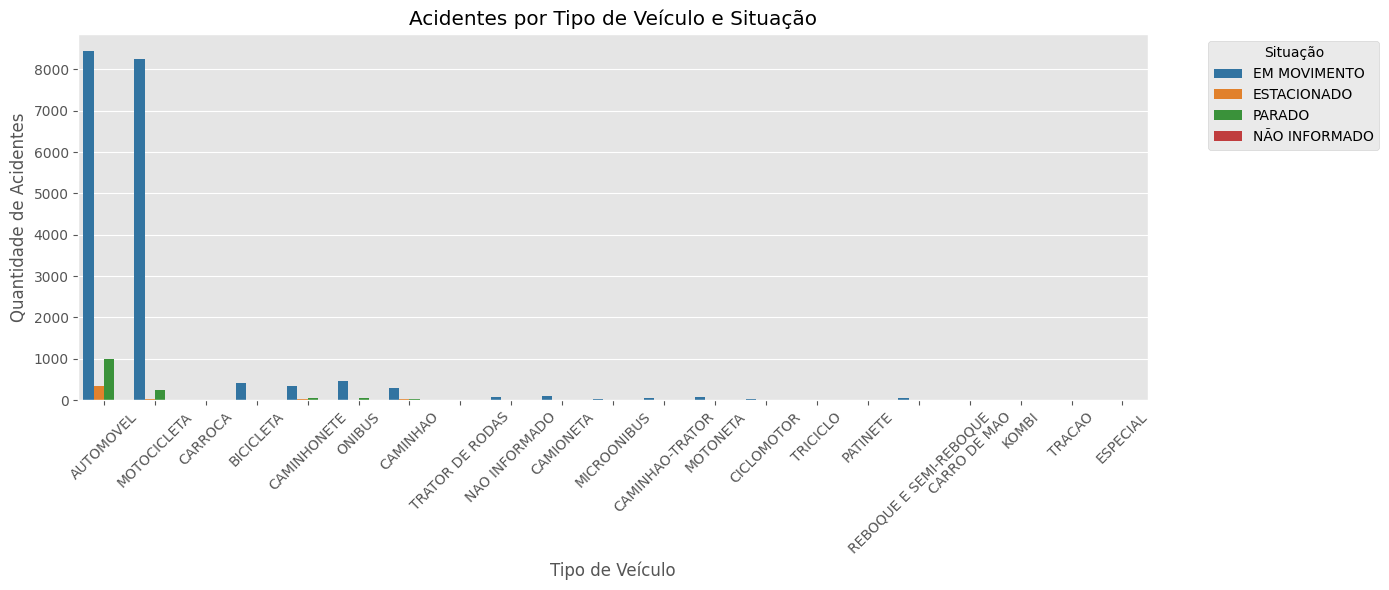

In [69]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='descricao_especie', hue='desc_situacao', palette='tab10')
plt.title('Acidentes por Tipo de Veículo e Situação')
plt.xlabel('Tipo de Veículo')
plt.ylabel('Quantidade de Acidentes')
plt.xticks(rotation=45)
plt.legend(title='Situação', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


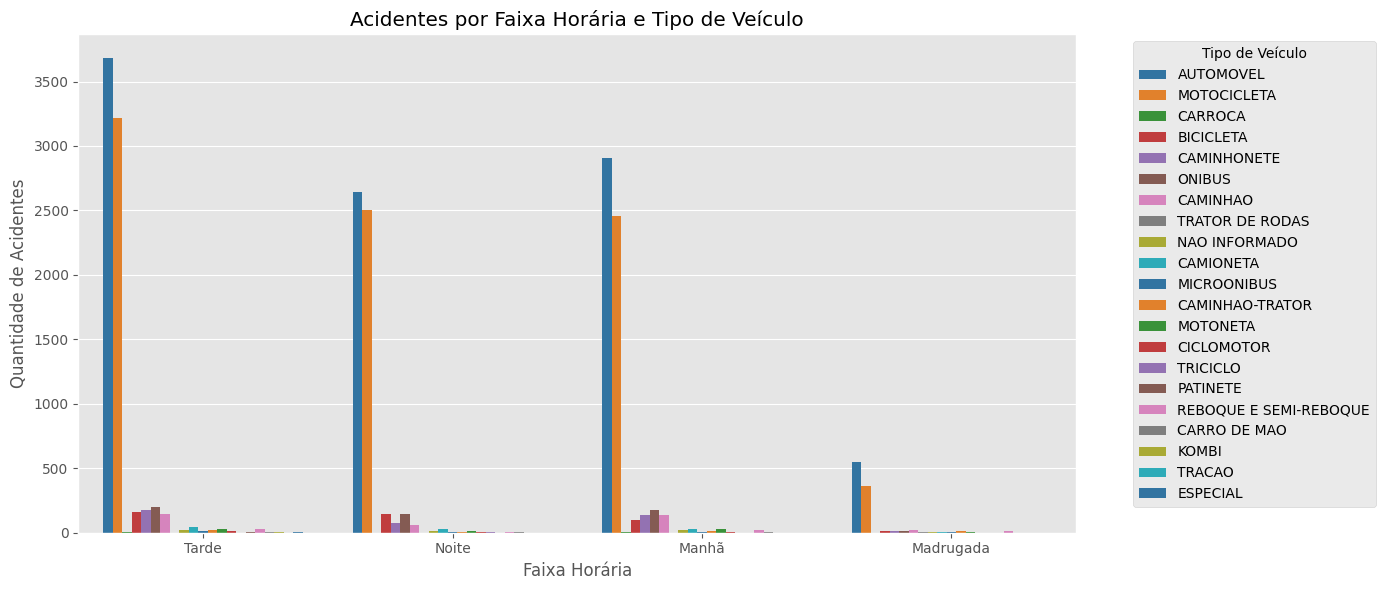

In [70]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='faixa_horaria', hue='descricao_especie', palette='tab10')
plt.title('Acidentes por Faixa Horária e Tipo de Veículo')
plt.xlabel('Faixa Horária')
plt.ylabel('Quantidade de Acidentes')
plt.legend(title='Tipo de Veículo', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


In [71]:
from scipy.stats import chi2_contingency

# Criar tabela de contingência tipo veículo x situação
tabela = pd.crosstab(df['descricao_especie'], df['desc_situacao'])

# Teste Qui-quadrado
chi2, p, dof, ex = chi2_contingency(tabela)

print(f'Qui-quadrado: {chi2:.2f}')
print(f'p-valor: {p:.4f}')

if p < 0.05:
    print('Há associação significativa entre tipo de veículo e situação.')
else:
    print('Não há associação significativa entre tipo de veículo e situação.')


Qui-quadrado: 861.68
p-valor: 0.0000
Há associação significativa entre tipo de veículo e situação.


# 15. OUTLIERS

In [81]:
import pandas as pd

# Seleciona só colunas numéricas
num_cols = df.select_dtypes(include=['number']).columns

outliers_summary = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
    outliers_summary[col] = outliers.shape[0]

# Mostrar resumo dos outliers por coluna
print("Outliers por coluna (baseado no método IQR):")
for col, count in outliers_summary.items():
    print(f"{col}: {count} outliers")


Outliers por coluna (baseado no método IQR):
seq_veic: 217 outliers
ano: 0 outliers
mes: 0 outliers
hora: 0 outliers


In [82]:
Q1 = df['seq_veic'].quantile(0.25)
Q3 = df['seq_veic'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers_seq_veic = df[(df['seq_veic'] < limite_inferior) | (df['seq_veic'] > limite_superior)]

print(outliers_seq_veic)


               Nº_boletim   data_hora_boletim  seq_veic descricao_categoria  \
15     2021-014115961-001 2021-03-21 20:08:00         4          PARTICULAR   
16     2021-014115961-001 2021-03-21 20:08:00         5          PARTICULAR   
370    2021-008119315-001 2021-02-16 09:38:00         4          PARTICULAR   
429    2021-011845293-001 2021-03-08 20:44:00         4          PARTICULAR   
670    2021-008470526-001 2021-02-18 04:33:00         4             ALUGUEL   
...                   ...                 ...       ...                 ...   
20424  2021-024221989-001 2021-05-19 10:32:00         4          PARTICULAR   
20433  2021-033789181-001 2021-07-14 13:32:00         5             ALUGUEL   
20441  2021-054089087-001 2021-11-09 21:26:00         4          PARTICULAR   
20467  2021-054147734-001 2021-11-10 10:17:00         4          PARTICULAR   
20489  2021-043350014-001 2021-09-08 00:31:00         4          PARTICULAR   

            descricao_especie desc_situacao    desc

In [83]:
# Primeiro, calcula IQR pra garantir
q1 = df['seq_veic'].quantile(0.25)
q3 = df['seq_veic'].quantile(0.75)
iqr = q3 - q1
limite_superior = q3 + 1.5 * iqr

# Separa os dados
outliers = df[df['seq_veic'] > limite_superior]
normais = df[df['seq_veic'] <= limite_superior]


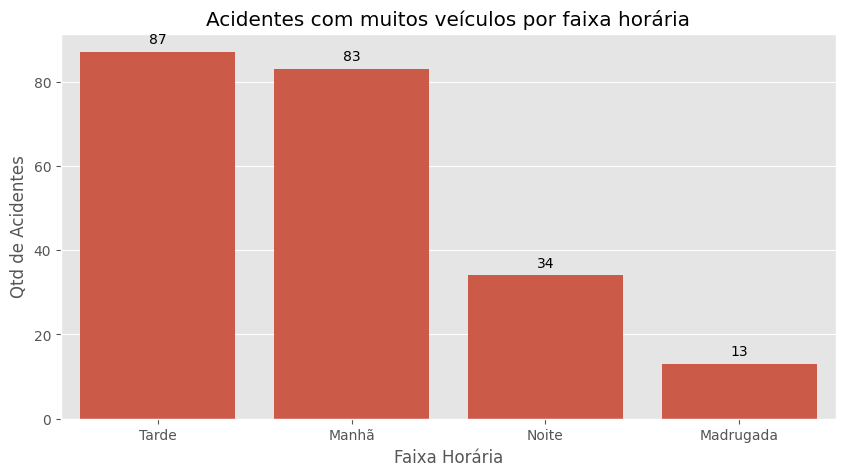

In [90]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=outliers, x='faixa_horaria', order=outliers['faixa_horaria'].value_counts().index)
plt.title('Acidentes com muitos veículos por faixa horária')
plt.xlabel('Faixa Horária')
plt.ylabel('Qtd de Acidentes')

# Adiciona os valores acima das barras
for p in ax.patches:
    altura = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., altura + 2, int(altura), ha='center')

plt.show()


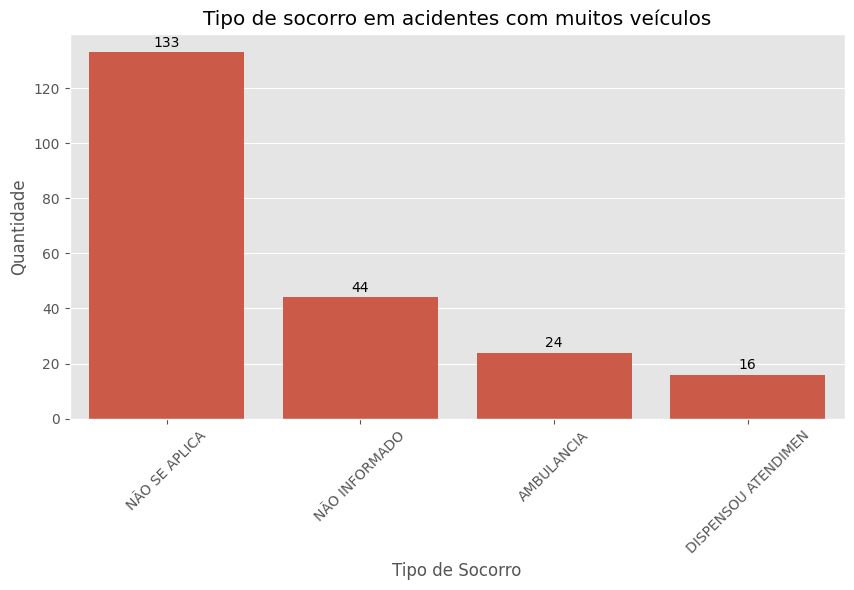

In [91]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=outliers, x='desc_tipo_socorro', order=outliers['desc_tipo_socorro'].value_counts().index)
plt.title('Tipo de socorro em acidentes com muitos veículos')
plt.xlabel('Tipo de Socorro')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)

for p in ax.patches:
    altura = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., altura + 2, int(altura), ha='center')

plt.show()


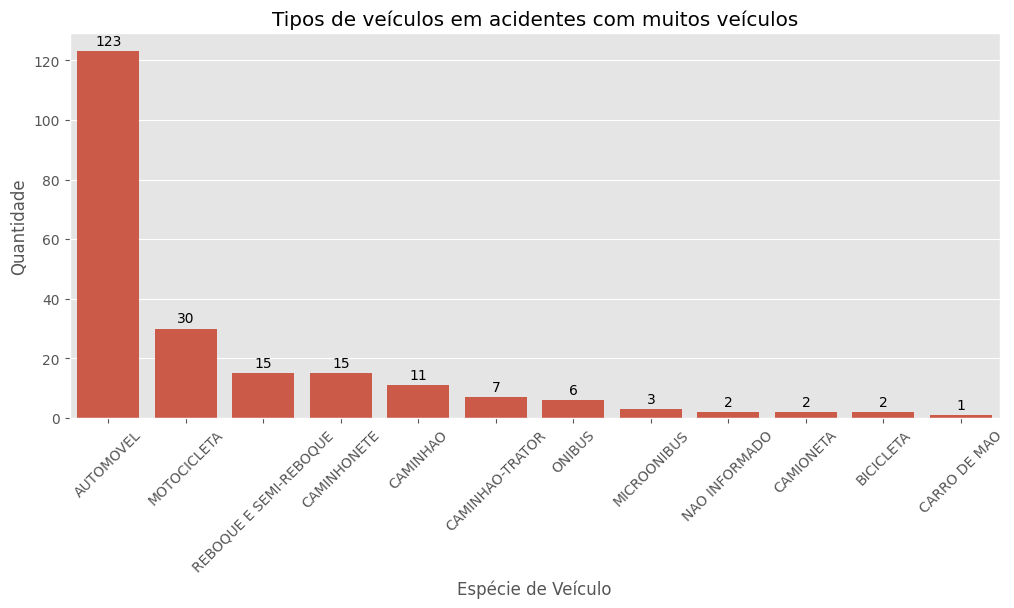

In [92]:
plt.figure(figsize=(12, 5))
ax = sns.countplot(data=outliers, x='descricao_especie', order=outliers['descricao_especie'].value_counts().index)
plt.title('Tipos de veículos em acidentes com muitos veículos')
plt.xlabel('Espécie de Veículo')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)

for p in ax.patches:
    altura = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., altura + 2, int(altura), ha='center')

plt.show()


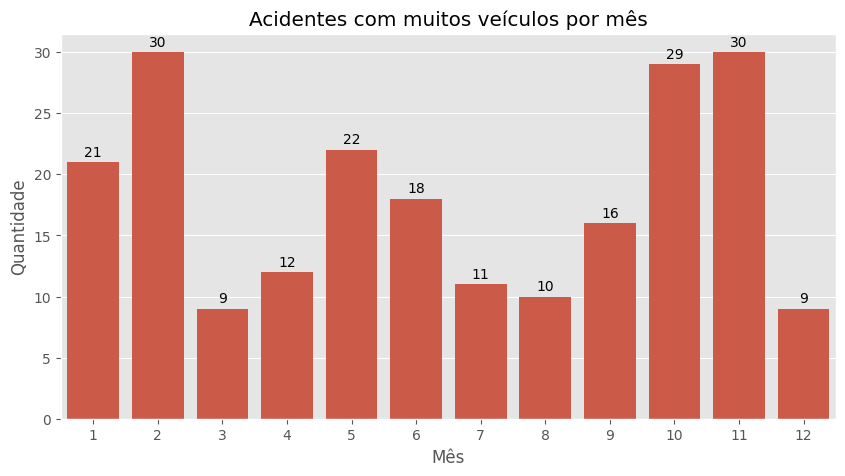

In [97]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=outliers, x='mes', order=sorted(outliers['mes'].unique()))
plt.title('Acidentes com muitos veículos por mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade')

for p in ax.patches:
    altura = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., altura + 0.5, int(altura), ha='center')

plt.show()


# 16. HISTOGRAMA

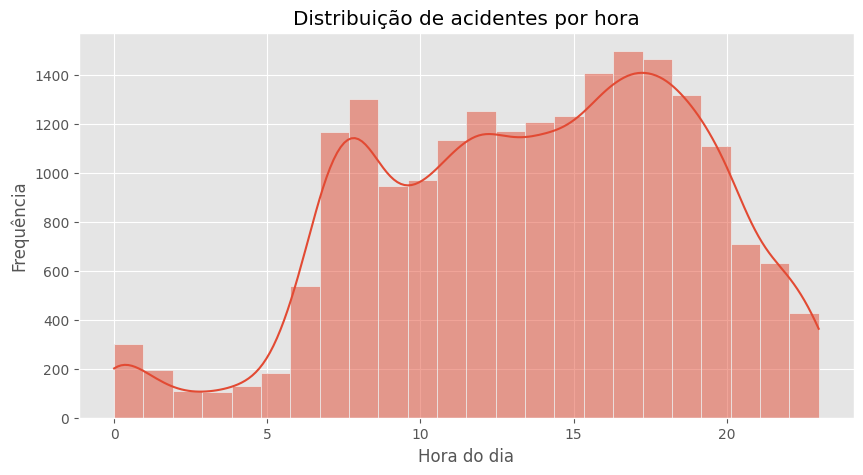

In [98]:
plt.figure(figsize=(10,5))
sns.histplot(df['hora'], bins=24, kde=True)
plt.title('Distribuição de acidentes por hora')
plt.xlabel('Hora do dia')
plt.ylabel('Frequência')
plt.show()


# 17. CONCLUSÕES FINAIS
- Principais Insights da Análise

A análise dos acidentes de trânsito ao longo de 2021 revelou padrões importantes que podem ajudar na formulação de políticas públicas e ações preventivas:

- **Horários Críticos**: A maior parte dos acidentes ocorreu no período da **tarde**, seguido por **manhã** e **noite**, com a **madrugada** apresentando menor frequência. Os acidentes aumentam especialmente no **fim da tarde (entre 16h e 19h)**, possivelmente ligados ao horário de pico e retorno do trabalho.

- **Dia da Semana**: A **sexta-feira** é o dia com maior número de ocorrências, sugerindo aumento no trânsito e possível relaxamento no comportamento dos condutores no fim da semana. Além disso, a maioria dos acidentes ocorre em **dias úteis**, o que reforça o impacto da rotina de trabalho no volume de acidentes.

- **Tipo de Veículo**: O **automóvel** foi, disparado, o veículo mais envolvido em acidentes. No entanto, a **motocicleta** também se destaca, com envolvimento frequente, o que pode estar associado a sua maior exposição e vulnerabilidade no trânsito.

- **Tipo de Socorro**: Um dado que chama atenção é o alto número de registros com **"NÃO SE APLICA"** como tipo de socorro, o que pode indicar que muitos acidentes foram apenas com danos materiais. Por outro lado, a presença de **ambulâncias** e **dispensa de atendimento** sugere que uma parcela relevante dos acidentes teve envolvimento de vítimas.

- **Sazonalidade**: Os meses de **agosto**, **julho** e **dezembro** foram os que registraram maior número de acidentes. Isso pode estar relacionado a maior movimentação nas férias escolares e festas de fim de ano, indicando necessidade de reforço na fiscalização nesses períodos.

- **Outliers**: Identificamos **217 casos** com número elevado de veículos envolvidos em um mesmo acidente. Esses casos podem indicar acidentes de maior porte, como engavetamentos, e merecem análise separada.

- **Situação dos Veículos**: A maioria dos acidentes ocorreu com os veículos **em movimento**, o que reforça a importância de ações de educação no trânsito e respeito à sinalização.

---

